In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix

In [49]:
pd.set_option('display.max_columns', None)  # or 1000

In [50]:
data = pd.read_csv("../datos/fake_UCI.csv")

In [51]:
data.head(5)

,Unnamed: 0,NHC,Dia,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x
0,0,5095.0,2020-04-16,57.0,1.0,NaN,83.0,948.0,577.0,1.0,-3.0,-1.000000,0.2,3.25,26.0,23.0,24.5,2.4,806.0,27.0,25.0,26.000000,92.0,5.57,1.5,0.13,0.8,-2.8,-0.975000,16.0,15.909091,15.0,23.0,17.818182,10.0,24129.0,100.0,49.545455,40.0,344.0,174.0,9.7,26.0,23.0,24.250000,1.15,757.0,1.4,40.07,2.2,1.9,36.8,8.1,6.0,6.0,6.0,15.0,10.727273,7.0,19.409091,27.0,9.0,7.39,7.33,7.362500,201.0,5.5,NaN,98.0,95.0,96.250000,132.0,13.0,40.3,NaN,156.0,785.0,504.636364,49.0,44.0,42.0,43.250000,120.0,76.0,91.500000,0
1,1,5095.0,2020-04-17,57.0,1.0,NaN,83.0,962.0,259.0,6.0,-3.0,0.333333,0.2,3.07,30.0,24.0,26.0,0.8,749.0,31.0,26.0,27.666667,95.0,5.28,1.0,0.22,5.8,-3.9,0.066667,16.0,16.000000,16.0,20.0,15.428571,11.0,8457.0,40.0,40.000000,40.0,452.0,169.0,9.4,30.0,22.0,25.333333,0.92,541.0,2.3,40.83,2.1,2.4,36.1,9.2,6.0,6.0,6.0,20.0,10.809524,7.0,17.523810,26.0,9.0,7.48,7.25,7.356667,172.0,5.5,NaN,99.0,91.0,94.666667,134.0,11.0,33.4,NaN,155.0,1213.0,446.190476,9.0,55.0,40.0,46.666667,151.0,72.0,99.666667,0
2,2,5095.0,2020-04-18,57.0,1.0,NaN,83.0,569.0,85.0,8.0,7.0,7.500000,0.1,2.59,31.0,31.0,31.0,0.7,465.0,33.0,32.0,32.500000,98.0,2.57,1.4,0.04,7.2,6.0,6.600000,NaN,NaN,NaN,31.0,26.208333,18.0,3795.0,NaN,NaN,NaN,529.0,135.0,8.0,31.0,30.0,30.500000,0.97,504.0,1.2,24.00,1.5,1.3,21.4,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49,7.46,7.475000,132.0,3.8,NaN,99.0,99.0,99.000000,135.0,11.0,26.7,NaN,61.0,NaN,NaN,NaN,43.0,41.0,42.000000,137.0,109.0,123.000000,0
3,3,5095.0,2020-04-19,57.0,1.0,NaN,83.0,319.0,42.0,7.0,6.0,6.500000,0.1,2.79,31.0,29.0,30.0,0.6,230.0,32.0,30.0,31.000000,93.0,3.42,1.5,0.08,6.6,5.5,6.050000,NaN,NaN,NaN,28.0,25.250000,21.0,2087.0,NaN,NaN,NaN,637.0,91.0,8.7,30.0,29.0,29.500000,0.97,383.0,1.0,18.80,1.5,1.3,16.0,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.50,7.49,7.495000,147.0,3.5,NaN,98.0,95.0,96.500000,130.0,11.0,27.8,NaN,86.0,NaN,NaN,NaN,40.0,37.0,38.500000,89.0,69.0,79.000000,0
4,4,2328.0,2020-03-24,48.0,1.0,154.0,61.0,59.0,65.0,0.0,0.0,0.000000,0.1,4.76,28.0,28.0,28.0,0.8,163.0,30.0,30.0,30.000000,102.0,1.13,117.9,0.56,-1.0,-1.0,-1.000000,NaN,NaN,NaN,22.0,19.695652,16.0,NaN,50.0,50.000000,50.0,73.0,156.0,14.9,24.0,24.0,24.000000,1.62,1091.0,1.9,18.53,1.4,0.9,15.7,5.2,14.0,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,7.25,7.25,7.250000,129.0,4.2,1.6,97.0,97.0,97.000000,139.0,19.0,31.2,NaN,69.0,NaN,NaN,NaN,63.0,63.0,63.000000,107.0,107.0,107.000000,0


# Data preprocessing

In [52]:
data = data.drop("Unnamed: 0", 1)

In [53]:
data.head(5)

,NHC,Dia,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x
0,5095.0,2020-04-16,57.0,1.0,NaN,83.0,948.0,577.0,1.0,-3.0,-1.000000,0.2,3.25,26.0,23.0,24.5,2.4,806.0,27.0,25.0,26.000000,92.0,5.57,1.5,0.13,0.8,-2.8,-0.975000,16.0,15.909091,15.0,23.0,17.818182,10.0,24129.0,100.0,49.545455,40.0,344.0,174.0,9.7,26.0,23.0,24.250000,1.15,757.0,1.4,40.07,2.2,1.9,36.8,8.1,6.0,6.0,6.0,15.0,10.727273,7.0,19.409091,27.0,9.0,7.39,7.33,7.362500,201.0,5.5,NaN,98.0,95.0,96.250000,132.0,13.0,40.3,NaN,156.0,785.0,504.636364,49.0,44.0,42.0,43.250000,120.0,76.0,91.500000,0
1,5095.0,2020-04-17,57.0,1.0,NaN,83.0,962.0,259.0,6.0,-3.0,0.333333,0.2,3.07,30.0,24.0,26.0,0.8,749.0,31.0,26.0,27.666667,95.0,5.28,1.0,0.22,5.8,-3.9,0.066667,16.0,16.000000,16.0,20.0,15.428571,11.0,8457.0,40.0,40.000000,40.0,452.0,169.0,9.4,30.0,22.0,25.333333,0.92,541.0,2.3,40.83,2.1,2.4,36.1,9.2,6.0,6.0,6.0,20.0,10.809524,7.0,17.523810,26.0,9.0,7.48,7.25,7.356667,172.0,5.5,NaN,99.0,91.0,94.666667,134.0,11.0,33.4,NaN,155.0,1213.0,446.190476,9.0,55.0,40.0,46.666667,151.0,72.0,99.666667,0
2,5095.0,2020-04-18,57.0,1.0,NaN,83.0,569.0,85.0,8.0,7.0,7.500000,0.1,2.59,31.0,31.0,31.0,0.7,465.0,33.0,32.0,32.500000,98.0,2.57,1.4,0.04,7.2,6.0,6.600000,NaN,NaN,NaN,31.0,26.208333,18.0,3795.0,NaN,NaN,NaN,529.0,135.0,8.0,31.0,30.0,30.500000,0.97,504.0,1.2,24.00,1.5,1.3,21.4,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49,7.46,7.475000,132.0,3.8,NaN,99.0,99.0,99.000000,135.0,11.0,26.7,NaN,61.0,NaN,NaN,NaN,43.0,41.0,42.000000,137.0,109.0,123.000000,0
3,5095.0,2020-04-19,57.0,1.0,NaN,83.0,319.0,42.0,7.0,6.0,6.500000,0.1,2.79,31.0,29.0,30.0,0.6,230.0,32.0,30.0,31.000000,93.0,3.42,1.5,0.08,6.6,5.5,6.050000,NaN,NaN,NaN,28.0,25.250000,21.0,2087.0,NaN,NaN,NaN,637.0,91.0,8.7,30.0,29.0,29.500000,0.97,383.0,1.0,18.80,1.5,1.3,16.0,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.50,7.49,7.495000,147.0,3.5,NaN,98.0,95.0,96.500000,130.0,11.0,27.8,NaN,86.0,NaN,NaN,NaN,40.0,37.0,38.500000,89.0,69.0,79.000000,0
4,2328.0,2020-03-24,48.0,1.0,154.0,61.0,59.0,65.0,0.0,0.0,0.000000,0.1,4.76,28.0,28.0,28.0,0.8,163.0,30.0,30.0,30.000000,102.0,1.13,117.9,0.56,-1.0,-1.0,-1.000000,NaN,NaN,NaN,22.0,19.695652,16.0,NaN,50.0,50.000000,50.0,73.0,156.0,14.9,24.0,24.0,24.000000,1.62,1091.0,1.9,18.53,1.4,0.9,15.7,5.2,14.0,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,7.25,7.25,7.250000,129.0,4.2,1.6,97.0,97.0,97.000000,139.0,19.0,31.2,NaN,69.0,NaN,NaN,NaN,63.0,63.0,63.000000,107.0,107.0,107.000000,0


In [54]:
data.shape

(1804, 85)

In [55]:
features = data.columns
features

Index(['NHC', 'Dia', 'Edad', 'Sexo', 'altura', 'peso', 'ALT-GPT', 'AST-GOT',
       'BEecf_amax', 'BEecf_amin', 'BEecf_mean', 'Basófilos', 'Bicarbonato',
       'Bicarbonato Real_amax', 'Bicarbonato Real_amin',
       'Bicarbonato Real_mean', 'Bilirrubina T.', 'CK', 'CO2 Total_amax',
       'CO2 Total_amin', 'CO2 Total_mean', 'Cloro', 'Creatinina', 'Dimero D',
       'Eosinófilos', 'Exc. Bases_amax', 'Exc. Bases_amin', 'Exc. Bases_mean',
       'FR_pautada_max', 'FR_pautada_mean', 'FR_pautada_min', 'FR_real_max',
       'FR_real_mean', 'FR_real_min', 'Ferritina', 'FiO2_max', 'FiO2_mean',
       'FiO2_min', 'Fibrinógeno', 'Glucosa', 'HB', 'HCO3_amax', 'HCO3_amin',
       'HCO3_mean', 'INR', 'LDH', 'Lactato', 'Leucocitos', 'Linfocitos',
       'Monocitos', 'Neutrófilos', 'PCR', 'PEEP_max', 'PEEP_mean', 'PEEP_min',
       'PVA_med_max', 'PVA_med_mean', 'PVA_med_min', 'PVA_máx', 'PVA_máx_max',
       'PVA_máx_min', 'Ph Arterial_amax', 'Ph Arterial_amin',
       'Ph Arterial_mean', 'Plaquet

In [56]:
data.isnull().sum()

NHC              0
Dia              0
Edad            12
Sexo             0
altura        1410
              ... 
pCO2_mean        7
pO2_amax         0
pO2_amin         0
pO2_mean         0
death_48_x       0
Length: 85, dtype: int64

In [57]:
# Como se puede observar, faltan un 78 % de los valores en el atributo «altura», por lo que hay que decidir 
# si eliminar esta columna, debido a que supera el 75 % de valores perdidos.
# Por una parte, es el método normalmente recomendado. Sin embargo, solo se recomienda hacer esto cuando hay
# suficientes muestras en el dataset, y no es el caso, pues nos quedaríamos con tan solo 394 muestras.
# Se decide hacer una imputación múltiple.
# Hay que tener en cuenta que un mismo paciente aparece varias veces en el dataframe.

Se obtendrá una única fila por paciente para realizar la imputación de los valores, debido a que la altura es la misma
para el paciente, no puede cambiar. Una vez realizada la imputación múltiple sobre el dataframe con filas únicas por paciente, 
se juntarán ambos dataframe para obtener el dataframe de tamaño original, pero ahora sin valores NaN

In [58]:
unique_patient_df = data.drop_duplicates(subset=["NHC"])

In [59]:
# summarize the number of rows with missing values for each column
for feature in features:
	# count number of rows with missing values
	n_miss = data[feature].isnull().sum()
	perc = n_miss / data.shape[0] * 100
	print("> %s, Missing: %d (%.1f%%)" % (feature, n_miss, perc))

> NHC, Missing: 0 (0.0%)
> Dia, Missing: 0 (0.0%)
> Edad, Missing: 12 (0.7%)
> Sexo, Missing: 0 (0.0%)
> altura, Missing: 1410 (78.2%)
> peso, Missing: 0 (0.0%)
> ALT-GPT, Missing: 141 (7.8%)
> AST-GOT, Missing: 311 (17.2%)
> BEecf_amax, Missing: 41 (2.3%)
> BEecf_amin, Missing: 41 (2.3%)
> BEecf_mean, Missing: 41 (2.3%)
> Basófilos, Missing: 66 (3.7%)
> Bicarbonato, Missing: 69 (3.8%)
> Bicarbonato Real_amax, Missing: 41 (2.3%)
> Bicarbonato Real_amin, Missing: 41 (2.3%)
> Bicarbonato Real_mean, Missing: 41 (2.3%)
> Bilirrubina T., Missing: 159 (8.8%)
> CK, Missing: 232 (12.9%)
> CO2 Total_amax, Missing: 31 (1.7%)
> CO2 Total_amin, Missing: 31 (1.7%)
> CO2 Total_mean, Missing: 31 (1.7%)
> Cloro, Missing: 64 (3.5%)
> Creatinina, Missing: 77 (4.3%)
> Dimero D, Missing: 201 (11.1%)
> Eosinófilos, Missing: 66 (3.7%)
> Exc. Bases_amax, Missing: 32 (1.8%)
> Exc. Bases_amin, Missing: 32 (1.8%)
> Exc. Bases_mean, Missing: 32 (1.8%)
> FR_pautada_max, Missing: 484 (26.8%)
> FR_pautada_mean, Mis

## Imputación múltiple

In [60]:
data_no_date = unique_patient_df.drop("Dia", 1)

In [61]:
iter_imputer = IterativeImputer(estimator=KNeighborsRegressor(), n_nearest_features=None, imputation_order='ascending')

In [62]:
iter_imputer.fit(data_no_date)
imputed_df = iter_imputer.transform(data_no_date)
imputed_df = pd.DataFrame(imputed_df, columns=data_no_date.columns)

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [63]:
imputed_df.isnull().sum()

NHC           0
Edad          0
Sexo          0
altura        0
peso          0
             ..
pCO2_mean     0
pO2_amax      0
pO2_amin      0
pO2_mean      0
death_48_x    0
Length: 84, dtype: int64

In [64]:
imputed_df.insert(loc=1, column="Dia", value=data["Dia"])
unique_patient_df = imputed_df

In [65]:
unique_patient_df.head()

,NHC,Dia,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x
0,5095.0,2020-04-16,57.0,1.0,165.6,83.0,948.0,577.0,1.0,-3.0,-1.0,0.2,3.25,26.0,23.0,24.5,2.4,806.0,27.0,25.0,26.0,92.0,5.57,1.5,0.13,0.8,-2.8,-0.975,16.0,15.909091,15.0,23.0,17.818182,10.0,24129.0,100.0,49.545455,40.0,344.0,174.0,9.7,26.0,23.0,24.25,1.15,757.0,1.4,40.07,2.2,1.9,36.8,8.1,6.0,6.000000,6.0,15.0,10.727273,7.0,19.409091,27.0,9.0,7.39,7.33,7.3625,201.0,5.5,0.48,98.0,95.0,96.25,132.0,13.0,40.30,358.310,156.0,785.00,504.636364,49.00,44.0,42.0,43.25,120.0,76.0,91.5,0.0
1,2328.0,2020-04-17,48.0,1.0,154.0,61.0,59.0,65.0,0.0,0.0,0.0,0.1,4.76,28.0,28.0,28.0,0.8,163.0,30.0,30.0,30.0,102.0,1.13,117.9,0.56,-1.0,-1.0,-1.000,19.2,18.783333,17.6,22.0,19.695652,16.0,1371.4,50.0,50.000000,50.0,73.0,156.0,14.9,24.0,24.0,24.00,1.62,1091.0,1.9,18.53,1.4,0.9,15.7,5.2,14.0,14.000000,14.0,17.6,16.203457,14.6,26.943137,29.8,20.8,7.25,7.25,7.2500,129.0,4.2,1.60,97.0,97.0,97.00,139.0,19.0,31.20,141.838,69.0,599.48,491.604608,455.84,63.0,63.0,63.00,107.0,107.0,107.0,0.0
2,5.0,2020-04-18,63.0,0.0,156.8,73.0,51.0,39.0,4.0,4.0,4.0,0.0,4.16,29.0,29.0,29.0,0.7,415.0,30.0,30.0,30.0,107.0,0.72,4.6,0.01,3.7,3.7,3.700,16.0,15.600000,12.0,34.0,16.710526,14.0,1622.0,100.0,71.650000,44.0,282.0,142.0,12.4,28.0,28.0,28.00,1.04,625.0,2.2,14.45,0.9,0.7,12.8,0.9,12.0,11.450000,8.0,22.0,18.725000,0.0,29.275000,38.0,0.0,7.43,7.43,7.4300,305.0,3.8,0.00,96.0,96.0,96.00,143.0,12.0,35.30,140.326,57.0,526.00,466.700000,0.00,43.0,43.0,43.00,113.0,76.0,94.5,0.0
3,7197.0,2020-04-19,31.0,1.0,157.6,68.0,108.0,81.0,5.0,3.0,4.0,0.0,4.26,29.0,28.0,28.5,0.5,14.0,31.0,29.0,30.0,104.0,0.69,2.0,0.00,4.2,2.7,3.450,18.0,16.925000,16.2,40.0,25.595745,0.0,1706.0,94.0,76.250000,60.0,744.0,134.0,12.6,28.0,27.0,27.50,1.01,481.0,1.9,0.87,0.1,0.1,0.6,6.1,11.6,11.250000,10.4,19.6,17.945804,15.6,28.275583,30.8,25.6,7.49,7.41,7.4425,143.0,3.9,0.10,98.0,98.0,98.00,141.0,12.0,34.08,43.020,27.0,557.92,509.378737,461.56,46.0,41.0,43.75,102.0,74.0,89.0,0.0
4,5655.0,2020-03-24,42.0,1.0,169.0,94.0,28.0,97.0,3.0,3.0,3.0,0.0,4.27,30.0,30.0,30.0,0.4,562.0,32.0,32.0,32.0,100.0,0.50,5.3,0.00,1.2,1.2,1.200,15.0,15.000000,15.0,26.0,18.076923,15.0,3628.8,70.0,68.333333,65.0,389.0,166.0,13.7,26.0,26.0,26.00,0.98,621.0,0.8,5.06,1.1,0.3,3.7,9.1,22.0,18.282051,14.0,25.0,21.923077,21.0,26.694297,32.2,18.6,7.25,7.25,7.2500,147.0,5.4,0.20,98.0,98.0,98.00,132.0,11.0,33.80,37.618,25.0,482.00,482.000000,482.00,69.0,69.0,69.00,120.0,120.0,120.0,0.0


In [66]:
patient_vitals_df = data.set_index("NHC").combine_first(unique_patient_df.set_index("NHC")).reset_index()

In [67]:
patient_vitals_df.head()

,NHC,Dia,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x
0,5.0,2020-04-02,63.0,0.0,156.8,73.0,51.0,39.0,4.0,4.0,4.0,0.00,4.160,29.0,29.0,29.000000,0.7,415.0,30.0,30.0,30.000000,107.0,0.72,4.6,0.010,3.7,3.7,3.700000,16.0,15.6,12.0,34.0,16.710526,14.0,1622.0,100.0,71.650000,44.0,282.0,142.0,12.40,28.0,28.0,28.000000,1.04,625.0,2.2,14.450,0.90,0.70,12.80,0.9,12.0,11.4500,8.0,22.0,18.725000,0.0,29.275000,38.0,0.0,7.43,7.43,7.430000,305.0,3.8,0.00,96.0,96.0,96.000000,143.0,12.0,35.3,140.326,57.0,526.0,466.700000,0.0,43.0,43.0,43.000000,113.0,76.0,94.50,0
1,5.0,2020-04-03,63.0,0.0,156.8,73.0,48.0,29.0,3.0,2.0,2.5,0.00,4.040,27.0,26.0,26.500000,0.8,228.0,28.0,27.0,27.500000,109.0,0.62,6.9,0.030,2.8,1.7,2.275000,16.0,16.0,16.0,16.0,16.000000,16.0,1522.0,56.0,50.187500,46.0,246.0,138.0,12.60,27.0,26.0,26.625000,1.05,601.0,2.8,9.310,0.90,0.50,8.10,0.6,12.0,11.5000,10.0,19.0,16.895833,14.0,24.854167,29.0,21.0,7.48,7.41,7.447500,328.0,3.9,0.00,98.0,98.0,98.000000,146.0,12.0,35.3,140.326,69.0,578.0,473.041667,300.0,42.0,35.0,38.250000,103.0,98.0,100.75,0
2,5.0,2020-04-04,63.0,0.0,156.8,73.0,37.0,15.0,4.0,1.0,2.5,0.10,3.980,25.0,25.0,25.000000,0.7,143.0,28.7,26.0,27.350000,109.0,0.59,17.5,0.000,5.6,1.1,3.866667,16.0,16.0,16.0,21.0,15.229167,8.0,1314.0,52.0,45.270833,40.0,282.0,145.0,11.80,29.3,26.0,27.900000,1.04,456.0,2.8,10.360,0.70,0.30,9.30,0.2,10.0,8.5625,5.0,15.0,10.916667,0.0,17.312500,25.0,0.0,7.52,7.44,7.487500,211.0,4.3,0.00,99.0,96.0,97.500000,145.0,12.0,35.3,140.326,83.0,703.0,435.376042,0.0,37.0,35.0,36.000000,119.0,72.0,93.75,0
3,5.0,2020-04-05,63.0,0.0,156.8,73.0,48.0,29.0,6.0,6.0,6.0,0.00,4.390,29.0,29.0,29.000000,0.6,135.0,30.0,30.0,30.000000,106.0,0.50,21.7,0.000,5.2,5.2,5.200000,16.0,15.6,12.0,23.0,16.625000,11.0,1577.0,52.0,50.634146,43.0,282.0,131.0,12.80,29.0,29.0,29.000000,1.04,526.0,3.0,13.340,0.70,0.50,12.10,0.2,5.0,5.0000,5.0,0.0,0.000000,0.0,0.000000,0.0,0.0,7.48,7.48,7.480000,237.0,4.4,0.00,97.0,97.0,97.000000,143.0,12.0,35.3,140.326,61.0,0.0,0.000000,0.0,39.0,39.0,39.000000,85.0,85.0,85.00,0
4,36.0,2020-04-07,60.0,0.0,156.8,41.0,89.0,30.0,15.0,12.0,14.0,0.04,3.792,38.0,36.0,37.333333,0.8,36.0,39.0,37.0,38.333333,98.0,0.60,5.8,0.006,13.0,10.3,12.066667,15.0,15.0,15.0,24.0,18.500000,15.0,1738.0,40.0,40.000000,40.0,156.0,207.0,11.64,35.0,33.0,34.333333,1.04,683.0,2.6,10.168,1.04,0.32,8.46,0.1,8.0,8.0000,8.0,19.0,16.974090,11.8,19.200000,20.0,19.0,7.52,7.46,7.496667,203.4,4.4,0.24,98.0,97.0,97.333333,141.0,12.0,26.0,7.870,81.0,651.0,517.333333,462.0,50.0,46.0,47.666667,97.0,83.0,89.00,0


## Se crea la columna de fecha de alta (tanto para paciente fallecido como no)

En un principio, se creará un dataframe que solo contenga a los pacientes que hayan sobrevivido.

In [68]:
survived_patient_vitals_df = patient_vitals_df[patient_vitals_df["death_48_x"] == 0.0]

In [69]:
survived_patient_vitals_df.head()

,NHC,Dia,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x
0,5.0,2020-04-02,63.0,0.0,156.8,73.0,51.0,39.0,4.0,4.0,4.0,0.00,4.160,29.0,29.0,29.000000,0.7,415.0,30.0,30.0,30.000000,107.0,0.72,4.6,0.010,3.7,3.7,3.700000,16.0,15.6,12.0,34.0,16.710526,14.0,1622.0,100.0,71.650000,44.0,282.0,142.0,12.40,28.0,28.0,28.000000,1.04,625.0,2.2,14.450,0.90,0.70,12.80,0.9,12.0,11.4500,8.0,22.0,18.725000,0.0,29.275000,38.0,0.0,7.43,7.43,7.430000,305.0,3.8,0.00,96.0,96.0,96.000000,143.0,12.0,35.3,140.326,57.0,526.0,466.700000,0.0,43.0,43.0,43.000000,113.0,76.0,94.50,0
1,5.0,2020-04-03,63.0,0.0,156.8,73.0,48.0,29.0,3.0,2.0,2.5,0.00,4.040,27.0,26.0,26.500000,0.8,228.0,28.0,27.0,27.500000,109.0,0.62,6.9,0.030,2.8,1.7,2.275000,16.0,16.0,16.0,16.0,16.000000,16.0,1522.0,56.0,50.187500,46.0,246.0,138.0,12.60,27.0,26.0,26.625000,1.05,601.0,2.8,9.310,0.90,0.50,8.10,0.6,12.0,11.5000,10.0,19.0,16.895833,14.0,24.854167,29.0,21.0,7.48,7.41,7.447500,328.0,3.9,0.00,98.0,98.0,98.000000,146.0,12.0,35.3,140.326,69.0,578.0,473.041667,300.0,42.0,35.0,38.250000,103.0,98.0,100.75,0
2,5.0,2020-04-04,63.0,0.0,156.8,73.0,37.0,15.0,4.0,1.0,2.5,0.10,3.980,25.0,25.0,25.000000,0.7,143.0,28.7,26.0,27.350000,109.0,0.59,17.5,0.000,5.6,1.1,3.866667,16.0,16.0,16.0,21.0,15.229167,8.0,1314.0,52.0,45.270833,40.0,282.0,145.0,11.80,29.3,26.0,27.900000,1.04,456.0,2.8,10.360,0.70,0.30,9.30,0.2,10.0,8.5625,5.0,15.0,10.916667,0.0,17.312500,25.0,0.0,7.52,7.44,7.487500,211.0,4.3,0.00,99.0,96.0,97.500000,145.0,12.0,35.3,140.326,83.0,703.0,435.376042,0.0,37.0,35.0,36.000000,119.0,72.0,93.75,0
3,5.0,2020-04-05,63.0,0.0,156.8,73.0,48.0,29.0,6.0,6.0,6.0,0.00,4.390,29.0,29.0,29.000000,0.6,135.0,30.0,30.0,30.000000,106.0,0.50,21.7,0.000,5.2,5.2,5.200000,16.0,15.6,12.0,23.0,16.625000,11.0,1577.0,52.0,50.634146,43.0,282.0,131.0,12.80,29.0,29.0,29.000000,1.04,526.0,3.0,13.340,0.70,0.50,12.10,0.2,5.0,5.0000,5.0,0.0,0.000000,0.0,0.000000,0.0,0.0,7.48,7.48,7.480000,237.0,4.4,0.00,97.0,97.0,97.000000,143.0,12.0,35.3,140.326,61.0,0.0,0.000000,0.0,39.0,39.0,39.000000,85.0,85.0,85.00,0
4,36.0,2020-04-07,60.0,0.0,156.8,41.0,89.0,30.0,15.0,12.0,14.0,0.04,3.792,38.0,36.0,37.333333,0.8,36.0,39.0,37.0,38.333333,98.0,0.60,5.8,0.006,13.0,10.3,12.066667,15.0,15.0,15.0,24.0,18.500000,15.0,1738.0,40.0,40.000000,40.0,156.0,207.0,11.64,35.0,33.0,34.333333,1.04,683.0,2.6,10.168,1.04,0.32,8.46,0.1,8.0,8.0000,8.0,19.0,16.974090,11.8,19.200000,20.0,19.0,7.52,7.46,7.496667,203.4,4.4,0.24,98.0,97.0,97.333333,141.0,12.0,26.0,7.870,81.0,651.0,517.333333,462.0,50.0,46.0,47.666667,97.0,83.0,89.00,0


In [70]:
pd.options.mode.chained_assignment = None
survived_patient_vitals_df["Dia"] = pd.to_datetime(survived_patient_vitals_df["Dia"])

In [71]:
m1 = ~survived_patient_vitals_df.duplicated(["NHC"], keep="last")
m2 = survived_patient_vitals_df.duplicated(["NHC"], keep=False)
m = m1 & m2

In [72]:
survived_patient_vitals_df.loc[m, "discharge_date"] = survived_patient_vitals_df[m]["Dia"] + timedelta(days=2)

In [73]:
survived_patient_vitals_df.head()

,NHC,Dia,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x,discharge_date
0,5.0,2020-04-02,63.0,0.0,156.8,73.0,51.0,39.0,4.0,4.0,4.0,0.00,4.160,29.0,29.0,29.000000,0.7,415.0,30.0,30.0,30.000000,107.0,0.72,4.6,0.010,3.7,3.7,3.700000,16.0,15.6,12.0,34.0,16.710526,14.0,1622.0,100.0,71.650000,44.0,282.0,142.0,12.40,28.0,28.0,28.000000,1.04,625.0,2.2,14.450,0.90,0.70,12.80,0.9,12.0,11.4500,8.0,22.0,18.725000,0.0,29.275000,38.0,0.0,7.43,7.43,7.430000,305.0,3.8,0.00,96.0,96.0,96.000000,143.0,12.0,35.3,140.326,57.0,526.0,466.700000,0.0,43.0,43.0,43.000000,113.0,76.0,94.50,0,NaT
1,5.0,2020-04-03,63.0,0.0,156.8,73.0,48.0,29.0,3.0,2.0,2.5,0.00,4.040,27.0,26.0,26.500000,0.8,228.0,28.0,27.0,27.500000,109.0,0.62,6.9,0.030,2.8,1.7,2.275000,16.0,16.0,16.0,16.0,16.000000,16.0,1522.0,56.0,50.187500,46.0,246.0,138.0,12.60,27.0,26.0,26.625000,1.05,601.0,2.8,9.310,0.90,0.50,8.10,0.6,12.0,11.5000,10.0,19.0,16.895833,14.0,24.854167,29.0,21.0,7.48,7.41,7.447500,328.0,3.9,0.00,98.0,98.0,98.000000,146.0,12.0,35.3,140.326,69.0,578.0,473.041667,300.0,42.0,35.0,38.250000,103.0,98.0,100.75,0,NaT
2,5.0,2020-04-04,63.0,0.0,156.8,73.0,37.0,15.0,4.0,1.0,2.5,0.10,3.980,25.0,25.0,25.000000,0.7,143.0,28.7,26.0,27.350000,109.0,0.59,17.5,0.000,5.6,1.1,3.866667,16.0,16.0,16.0,21.0,15.229167,8.0,1314.0,52.0,45.270833,40.0,282.0,145.0,11.80,29.3,26.0,27.900000,1.04,456.0,2.8,10.360,0.70,0.30,9.30,0.2,10.0,8.5625,5.0,15.0,10.916667,0.0,17.312500,25.0,0.0,7.52,7.44,7.487500,211.0,4.3,0.00,99.0,96.0,97.500000,145.0,12.0,35.3,140.326,83.0,703.0,435.376042,0.0,37.0,35.0,36.000000,119.0,72.0,93.75,0,NaT
3,5.0,2020-04-05,63.0,0.0,156.8,73.0,48.0,29.0,6.0,6.0,6.0,0.00,4.390,29.0,29.0,29.000000,0.6,135.0,30.0,30.0,30.000000,106.0,0.50,21.7,0.000,5.2,5.2,5.200000,16.0,15.6,12.0,23.0,16.625000,11.0,1577.0,52.0,50.634146,43.0,282.0,131.0,12.80,29.0,29.0,29.000000,1.04,526.0,3.0,13.340,0.70,0.50,12.10,0.2,5.0,5.0000,5.0,0.0,0.000000,0.0,0.000000,0.0,0.0,7.48,7.48,7.480000,237.0,4.4,0.00,97.0,97.0,97.000000,143.0,12.0,35.3,140.326,61.0,0.0,0.000000,0.0,39.0,39.0,39.000000,85.0,85.0,85.00,0,2020-04-07
4,36.0,2020-04-07,60.0,0.0,156.8,41.0,89.0,30.0,15.0,12.0,14.0,0.04,3.792,38.0,36.0,37.333333,0.8,36.0,39.0,37.0,38.333333,98.0,0.60,5.8,0.006,13.0,10.3,12.066667,15.0,15.0,15.0,24.0,18.500000,15.0,1738.0,40.0,40.000000,40.0,156.0,207.0,11.64,35.0,33.0,34.333333,1.04,683.0,2.6,10.168,1.04,0.32,8.46,0.1,8.0,8.0000,8.0,19.0,16.974090,11.8,19.200000,20.0,19.0,7.52,7.46,7.496667,203.4,4.4,0.24,98.0,97.0,97.333333,141.0,12.0,26.0,7.870,81.0,651.0,517.333333,462.0,50.0,46.0,47.666667,97.0,83.0,89.00,0,NaT


## Se calcula la media de las connstantes vitales de cada paciente

Guardamos las fechas

In [74]:
m1 = ~survived_patient_vitals_df.duplicated(["NHC"], keep="first")
m2 = survived_patient_vitals_df.duplicated(["NHC"], keep=False)
m = m1 & m2

In [75]:
fechas_df = survived_patient_vitals_df[["NHC", "Dia"]].copy()
fechas_df.loc[m, "admit_date"] = survived_patient_vitals_df[m]["Dia"]
fechas_df = fechas_df.drop(["NHC","Dia"], 1)
fechas_df = fechas_df.dropna()
fechas_df = fechas_df.reset_index()
fechas_df = fechas_df.drop("index", 1)

In [76]:
fechas_df.head()

,admit_date
0,2020-04-02
1,2020-04-07
2,2020-03-25
3,2020-04-09
4,2020-03-28


In [77]:
fechas_df["discharge_date"] = pd.DataFrame(survived_patient_vitals_df[survived_patient_vitals_df["discharge_date"].notnull()]["discharge_date"]).reset_index().drop("index", 1)

In [78]:
fechas_df.head()

,admit_date,discharge_date
0,2020-04-02,2020-04-07
1,2020-04-07,2020-05-21
2,2020-03-25,2020-04-15
3,2020-04-09,2020-04-20
4,2020-03-28,2020-04-16


In [79]:
fechas_df["days_of_stay"] = fechas_df["discharge_date"] - fechas_df["admit_date"]
fechas_df["days_of_stay"] = fechas_df["days_of_stay"].dt.days

In [80]:
fechas_df.head()

,admit_date,discharge_date,days_of_stay
0,2020-04-02,2020-04-07,5
1,2020-04-07,2020-05-21,44
2,2020-03-25,2020-04-15,21
3,2020-04-09,2020-04-20,11
4,2020-03-28,2020-04-16,19


In [81]:
grouped_patient_df = survived_patient_vitals_df.groupby("NHC")

mean_patient_df = grouped_patient_df.mean()

mean_patient_df = mean_patient_df.reset_index()

In [82]:
mean_patient_df.head()

,NHC,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x
0,5.0,63.0,0.0,156.8,73.0,46.000000,28.000000,4.250000,3.250000,3.750000,0.025000,4.142500,27.500000,27.250000,27.375000,0.700000,230.250000,29.175000,28.250000,28.712500,107.750000,0.607500,12.675000,0.010000,4.325000,2.925000,3.760417,16.000000,15.800000,14.000000,23.500000,16.141173,12.250000,1508.750000,65.000000,54.435620,43.250000,273.000000,139.000000,12.400000,28.325000,27.250000,27.881250,1.042500,552.000000,2.700000,11.865000,0.800000,0.500000,10.575000,0.475000,9.750000,9.128125,7.000000,14.000000,11.634375,3.500000,17.860417,23.000000,5.250000,7.477500,7.440000,7.461250,270.250000,4.100000,0.000000,97.500000,96.750000,97.125000,144.250000,12.000000,35.300000,140.326000,67.500000,451.750000,343.779427,75.000000,40.250000,38.000000,39.062500,105.000000,82.750000,93.500000,0
1,36.0,60.0,0.0,156.8,41.0,55.302326,23.604651,10.976744,7.534884,9.261434,0.034419,3.103581,34.906977,31.604651,33.272093,0.995349,88.604651,36.534884,33.000000,34.740116,101.279070,0.447442,4.827907,0.128884,9.502326,6.400000,8.006279,15.558140,15.395349,15.232558,30.837209,21.673081,17.046512,1411.720930,77.767442,61.896761,54.348837,540.023256,118.069767,9.383256,32.465116,29.976744,31.289922,1.096977,443.418605,1.434884,9.570837,0.836744,0.561395,8.114419,8.793023,12.018605,9.684847,7.232558,22.581395,19.368609,15.627907,20.236047,21.488372,19.441860,7.484884,7.406512,7.447254,153.506977,3.930233,0.167907,98.674419,96.511628,97.707558,140.558140,12.581395,26.990698,19.857907,33.534884,565.953488,476.269601,434.116279,54.744186,44.023256,48.847287,130.767442,88.441860,108.410271,0
2,250.0,38.0,0.0,156.8,103.0,14.444444,26.400000,8.944444,8.277778,8.620370,0.066667,3.357778,33.277778,32.722222,33.009259,0.316667,310.555556,34.833333,34.222222,34.546296,101.333333,0.603333,1.583333,0.177778,7.866667,6.616667,7.269444,19.777778,18.441918,17.277778,31.277778,22.304703,17.333333,676.444444,76.388889,51.025814,46.055556,505.388889,124.833333,9.972222,31.194444,30.000000,30.575000,1.107222,314.666667,1.544444,7.992222,2.111111,0.944444,4.727778,7.777778,11.444444,10.781704,9.944444,19.722222,16.257240,12.611111,27.053955,32.500000,22.055556,7.453333,7.270556,7.398380,282.888889,3.727778,0.150000,93.277778,91.555556,92.507407,141.555556,12.777778,43.383333,125.334778,35.333333,428.055556,329.144170,191.500000,51.055556,46.111111,48.569444,119.055556,67.444444,93.310185,0
3,268.0,46.6,0.0,156.8,55.0,59.980000,37.260000,21.380000,18.920000,20.088333,0.104000,3.519200,46.420000,43.820000,45.018333,0.478000,59.700000,48.580000,46.080000,47.208333,95.160000,0.348600,1.262000,0.439600,17.650000,15.280000,16.398667,22.800000,22.097826,20.800000,24.100000,20.904167,14.600000,1697.600000,91.500000,78.466499,69.500000,239.740000,119.300000,12.274000,38.460000,36.420000,37.416667,0.941600,587.520000,2.310000,20.186800,0.794000,0.922000,17.916000,1.000000,8.100000,7.508712,6.900000,17.000000,15.265234,14.400000,28.949786,32.400000,26.900000,7.429000,7.342000,7.382867,119.040000,4.040000,0.226000,91.980000,89.260000,90.545000,140.060000,10.880000,36.130

In [83]:
mean_patient_df[["admit_date", "discharge_date", "days_of_stay"]] = fechas_df

In [84]:
mean_patient_df.head()

,NHC,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x,admit_date,discharge_date,days_of_stay
0,5.0,63.0,0.0,156.8,73.0,46.000000,28.000000,4.250000,3.250000,3.750000,0.025000,4.142500,27.500000,27.250000,27.375000,0.700000,230.250000,29.175000,28.250000,28.712500,107.750000,0.607500,12.675000,0.010000,4.325000,2.925000,3.760417,16.000000,15.800000,14.000000,23.500000,16.141173,12.250000,1508.750000,65.000000,54.435620,43.250000,273.000000,139.000000,12.400000,28.325000,27.250000,27.881250,1.042500,552.000000,2.700000,11.865000,0.800000,0.500000,10.575000,0.475000,9.750000,9.128125,7.000000,14.000000,11.634375,3.500000,17.860417,23.000000,5.250000,7.477500,7.440000,7.461250,270.250000,4.100000,0.000000,97.500000,96.750000,97.125000,144.250000,12.000000,35.300000,140.326000,67.500000,451.750000,343.779427,75.000000,40.250000,38.000000,39.062500,105.000000,82.750000,93.500000,0,2020-04-02,2020-04-07,5
1,36.0,60.0,0.0,156.8,41.0,55.302326,23.604651,10.976744,7.534884,9.261434,0.034419,3.103581,34.906977,31.604651,33.272093,0.995349,88.604651,36.534884,33.000000,34.740116,101.279070,0.447442,4.827907,0.128884,9.502326,6.400000,8.006279,15.558140,15.395349,15.232558,30.837209,21.673081,17.046512,1411.720930,77.767442,61.896761,54.348837,540.023256,118.069767,9.383256,32.465116,29.976744,31.289922,1.096977,443.418605,1.434884,9.570837,0.836744,0.561395,8.114419,8.793023,12.018605,9.684847,7.232558,22.581395,19.368609,15.627907,20.236047,21.488372,19.441860,7.484884,7.406512,7.447254,153.506977,3.930233,0.167907,98.674419,96.511628,97.707558,140.558140,12.581395,26.990698,19.857907,33.534884,565.953488,476.269601,434.116279,54.744186,44.023256,48.847287,130.767442,88.441860,108.410271,0,2020-04-07,2020-05-21,44
2,250.0,38.0,0.0,156.8,103.0,14.444444,26.400000,8.944444,8.277778,8.620370,0.066667,3.357778,33.277778,32.722222,33.009259,0.316667,310.555556,34.833333,34.222222,34.546296,101.333333,0.603333,1.583333,0.177778,7.866667,6.616667,7.269444,19.777778,18.441918,17.277778,31.277778,22.304703,17.333333,676.444444,76.388889,51.025814,46.055556,505.388889,124.833333,9.972222,31.194444,30.000000,30.575000,1.107222,314.666667,1.544444,7.992222,2.111111,0.944444,4.727778,7.777778,11.444444,10.781704,9.944444,19.722222,16.257240,12.611111,27.053955,32.500000,22.055556,7.453333,7.270556,7.398380,282.888889,3.727778,0.150000,93.277778,91.555556,92.507407,141.555556,12.777778,43.383333,125.334778,35.333333,428.055556,329.144170,191.500000,51.055556,46.111111,48.569444,119.055556,67.444444,93.310185,0,2020-03-25,2020-04-15,21
3,268.0,46.6,0.0,156.8,55.0,59.980000,37.260000,21.380000,18.920000,20.088333,0.104000,3.519200,46.420000,43.820000,45.018333,0.478000,59.700000,48.580000,46.080000,47.208333,95.160000,0.348600,1.262000,0.439600,17.650000,15.280000,16.398667,22.800000,22.097826,20.800000,24.100000,20.904167,14.600000,1697.600000,91.500000,78.466499,69.500000,239.740000,119.300000,12.274000,38.460000,36.420000,37.416667,0.941600,587.520000,2.310000,20.186800,0.794000,0.922000,17.916000,1.000000,8.100000,7.508712,6.900000,17.000000,15.265234,14.400000,28.949786,32.400000,26.900000,

In [85]:
survived_patients_vitals_length_of_stay_df = mean_patient_df.drop(["NHC", "death_48_x", "admit_date", "discharge_date"], 1)

In [86]:
survived_patients_vitals_length_of_stay_df.head()

,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,days_of_stay
0,63.0,0.0,156.8,73.0,46.000000,28.000000,4.250000,3.250000,3.750000,0.025000,4.142500,27.500000,27.250000,27.375000,0.700000,230.250000,29.175000,28.250000,28.712500,107.750000,0.607500,12.675000,0.010000,4.325000,2.925000,3.760417,16.000000,15.800000,14.000000,23.500000,16.141173,12.250000,1508.750000,65.000000,54.435620,43.250000,273.000000,139.000000,12.400000,28.325000,27.250000,27.881250,1.042500,552.000000,2.700000,11.865000,0.800000,0.500000,10.575000,0.475000,9.750000,9.128125,7.000000,14.000000,11.634375,3.500000,17.860417,23.000000,5.250000,7.477500,7.440000,7.461250,270.250000,4.100000,0.000000,97.500000,96.750000,97.125000,144.250000,12.000000,35.300000,140.326000,67.500000,451.750000,343.779427,75.000000,40.250000,38.000000,39.062500,105.000000,82.750000,93.500000,5
1,60.0,0.0,156.8,41.0,55.302326,23.604651,10.976744,7.534884,9.261434,0.034419,3.103581,34.906977,31.604651,33.272093,0.995349,88.604651,36.534884,33.000000,34.740116,101.279070,0.447442,4.827907,0.128884,9.502326,6.400000,8.006279,15.558140,15.395349,15.232558,30.837209,21.673081,17.046512,1411.720930,77.767442,61.896761,54.348837,540.023256,118.069767,9.383256,32.465116,29.976744,31.289922,1.096977,443.418605,1.434884,9.570837,0.836744,0.561395,8.114419,8.793023,12.018605,9.684847,7.232558,22.581395,19.368609,15.627907,20.236047,21.488372,19.441860,7.484884,7.406512,7.447254,153.506977,3.930233,0.167907,98.674419,96.511628,97.707558,140.558140,12.581395,26.990698,19.857907,33.534884,565.953488,476.269601,434.116279,54.744186,44.023256,48.847287,130.767442,88.441860,108.410271,44
2,38.0,0.0,156.8,103.0,14.444444,26.400000,8.944444,8.277778,8.620370,0.066667,3.357778,33.277778,32.722222,33.009259,0.316667,310.555556,34.833333,34.222222,34.546296,101.333333,0.603333,1.583333,0.177778,7.866667,6.616667,7.269444,19.777778,18.441918,17.277778,31.277778,22.304703,17.333333,676.444444,76.388889,51.025814,46.055556,505.388889,124.833333,9.972222,31.194444,30.000000,30.575000,1.107222,314.666667,1.544444,7.992222,2.111111,0.944444,4.727778,7.777778,11.444444,10.781704,9.944444,19.722222,16.257240,12.611111,27.053955,32.500000,22.055556,7.453333,7.270556,7.398380,282.888889,3.727778,0.150000,93.277778,91.555556,92.507407,141.555556,12.777778,43.383333,125.334778,35.333333,428.055556,329.144170,191.500000,51.055556,46.111111,48.569444,119.055556,67.444444,93.310185,21
3,46.6,0.0,156.8,55.0,59.980000,37.260000,21.380000,18.920000,20.088333,0.104000,3.519200,46.420000,43.820000,45.018333,0.478000,59.700000,48.580000,46.080000,47.208333,95.160000,0.348600,1.262000,0.439600,17.650000,15.280000,16.398667,22.800000,22.097826,20.800000,24.100000,20.904167,14.600000,1697.600000,91.500000,78.466499,69.500000,239.740000,119.300000,12.274000,38.460000,36.420000,37.416667,0.941600,587.520000,2.310000,20.186800,0.794000,0.922000,17.916000,1.000000,8.100000,7.508712,6.900000,17.000000,15.265234,14.400000,28.949786,32.400000,26.900000,7.429000,7.342000,7.382867,119.040000,4.040000,0.226000,91.980000,89.260000,90.545000,140.060000,10.880000,36.130000,140.326000,38.080

# Correlation heat map

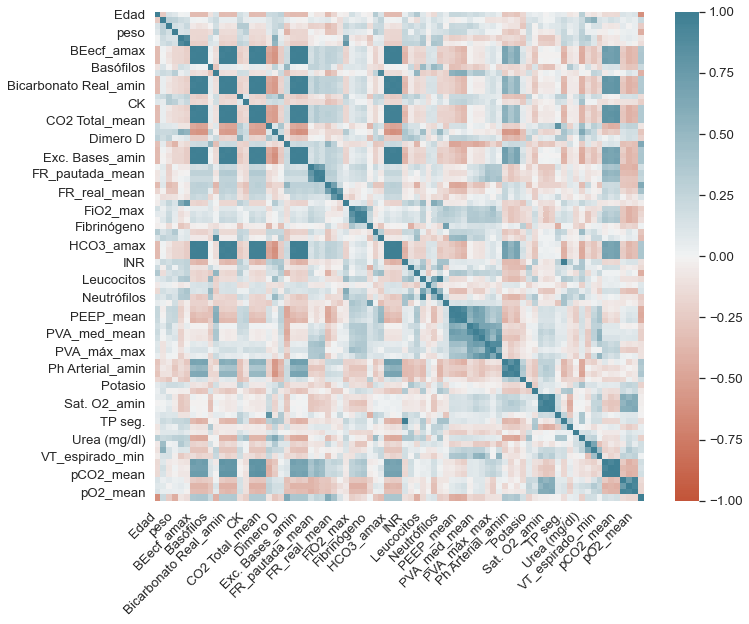

In [87]:
f, ax = plt.subplots(figsize=(11, 9))
corr = survived_patients_vitals_length_of_stay_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Análisis de datos exploratorio y visualización de datos

En esta sección, exploraré y visualizaré las relaciones subyacentes en los datos. Para el siguiente análisis, mantengo la duración de la estancia como variable principal en el eje Y, ya que es la variable de predicción para este proyecto. Por lo tanto, lo que más me interesa es ver cómo las características de este conjunto de datos afectan a la duración de la estancia. A continuación se enumeran algunas de las características que presentan la mayor varianza en la duración de la estancia.

En primer lugar, veamos la distribución univariante de los valores de duración de la estancia en el conjunto de datos.

In [88]:
survived_patients_vitals_length_of_stay_df.describe()

,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,days_of_stay
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,53.855914,0.731183,160.068817,72.768817,95.155157,66.271610,6.455203,4.628752,5.538998,0.055005,3.754706,31.131779,29.600269,30.355501,0.834639,240.511947,32.767811,31.077140,31.909809,103.588961,1.000615,9.924384,0.227563,5.430773,3.632677,4.531605,18.394011,17.621523,16.960340,24.328880,18.445399,13.606273,2249.894061,66.225255,54.547719,48.347666,458.547571,155.844895,11.321156,29.204797,27.779744,28.493126,1.135799,477.263359,2.014070,11.486249,1.145110,0.710238,9.418641,7.912991,10.964203,10.353964,9.705010,18.653476,15.907376,13.593297,24.919326,28.142497,21.684937,7.424157,7.376043,7.401118,243.777111,3.988618,1.287811,96.788095,94.867135,95.873219,141.240401,13.087352,35.588188,101.850360,64.996261,610.462755,491.611346,352.108857,52.135108,46.271323,49.065420,110.401678,87.021558,98.127215,20.946237
std,13.464458,0.445748,6.581628,15.156890,143.527665,62.185880,5.420526,5.214391,5.288882,0.033698,0.550889,5.025593,4.858113,4.911309,0.766472,230.907764,5.217885,4.973449,5.071163,4.108469,0.677393,13.900966,0.270309,4.668633,4.523634,4.561506,2.465303,1.826413,1.779167,4.447798,3.594649,4.376763,4004.622190,13.297925,10.172151,8.644741,187.744046,35.375041,1.578774,3.701860,3.538337,3.592810,0.157380,179.762862,0.594681,5.058527,1.173357,0.389603,4.831479,7.167076,2.258231,2.059135,2.028253,2.640829,2.480066,2.835669,3.738506,3.902810,4.624191,0.045585,0.046451,0.043645,78.549321,0.335868,3.581642,2.178572,2.790824,2.427079,3.529631,1.807930,8.186615,174.851764,33.176115,115.425453,68.575568,117.821388,8.331735,6.433783,7.196060,20.586734,15.088613,16.398114,16.648127
min,21.000000,0.000000,137.000000,41.000000,11.750000,16.916667,-14.000000,-15.000000,-14.500000,0.000000,2.885000,13.000000,12.000000,12.500000,0.281818,23.000000,14.000000,13.000000,13.500000,94.500000,0.348600,0.800000,0.000000,-12.500000,-13.100000,-12.733333,12.916667,12.577163,11.750000,10.000000,2.555556,0.000000,143.166667,39.818182,35.163532,30.181818,128.333333,96.333333,8.050000,15.000000,14.500000,14.833333,0.930833,243.733333,1.100000,3.630000,0.300000,0.150000,2.666667,0.440000,6.000000,6.000000,6.000000,6.727273,4.129049,2.181818,7.858346,12.909091,3.545455,7.280000,7.260000,7.268333,69.000000,3.240000,0.000

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


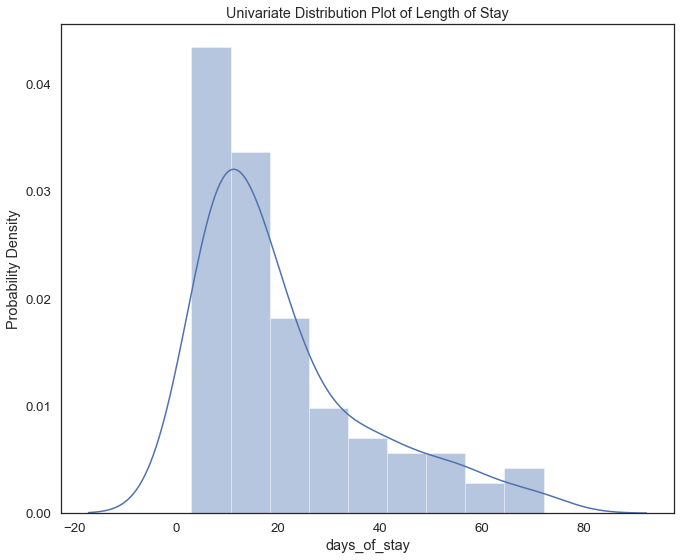

In [89]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(survived_patients_vitals_length_of_stay_df["days_of_stay"], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

Como se puede observar, la distribución está sesgada a la derecha.

In [90]:
survived_patients_vitals_length_of_stay_df.head()

,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,days_of_stay
0,63.0,0.0,156.8,73.0,46.000000,28.000000,4.250000,3.250000,3.750000,0.025000,4.142500,27.500000,27.250000,27.375000,0.700000,230.250000,29.175000,28.250000,28.712500,107.750000,0.607500,12.675000,0.010000,4.325000,2.925000,3.760417,16.000000,15.800000,14.000000,23.500000,16.141173,12.250000,1508.750000,65.000000,54.435620,43.250000,273.000000,139.000000,12.400000,28.325000,27.250000,27.881250,1.042500,552.000000,2.700000,11.865000,0.800000,0.500000,10.575000,0.475000,9.750000,9.128125,7.000000,14.000000,11.634375,3.500000,17.860417,23.000000,5.250000,7.477500,7.440000,7.461250,270.250000,4.100000,0.000000,97.500000,96.750000,97.125000,144.250000,12.000000,35.300000,140.326000,67.500000,451.750000,343.779427,75.000000,40.250000,38.000000,39.062500,105.000000,82.750000,93.500000,5
1,60.0,0.0,156.8,41.0,55.302326,23.604651,10.976744,7.534884,9.261434,0.034419,3.103581,34.906977,31.604651,33.272093,0.995349,88.604651,36.534884,33.000000,34.740116,101.279070,0.447442,4.827907,0.128884,9.502326,6.400000,8.006279,15.558140,15.395349,15.232558,30.837209,21.673081,17.046512,1411.720930,77.767442,61.896761,54.348837,540.023256,118.069767,9.383256,32.465116,29.976744,31.289922,1.096977,443.418605,1.434884,9.570837,0.836744,0.561395,8.114419,8.793023,12.018605,9.684847,7.232558,22.581395,19.368609,15.627907,20.236047,21.488372,19.441860,7.484884,7.406512,7.447254,153.506977,3.930233,0.167907,98.674419,96.511628,97.707558,140.558140,12.581395,26.990698,19.857907,33.534884,565.953488,476.269601,434.116279,54.744186,44.023256,48.847287,130.767442,88.441860,108.410271,44
2,38.0,0.0,156.8,103.0,14.444444,26.400000,8.944444,8.277778,8.620370,0.066667,3.357778,33.277778,32.722222,33.009259,0.316667,310.555556,34.833333,34.222222,34.546296,101.333333,0.603333,1.583333,0.177778,7.866667,6.616667,7.269444,19.777778,18.441918,17.277778,31.277778,22.304703,17.333333,676.444444,76.388889,51.025814,46.055556,505.388889,124.833333,9.972222,31.194444,30.000000,30.575000,1.107222,314.666667,1.544444,7.992222,2.111111,0.944444,4.727778,7.777778,11.444444,10.781704,9.944444,19.722222,16.257240,12.611111,27.053955,32.500000,22.055556,7.453333,7.270556,7.398380,282.888889,3.727778,0.150000,93.277778,91.555556,92.507407,141.555556,12.777778,43.383333,125.334778,35.333333,428.055556,329.144170,191.500000,51.055556,46.111111,48.569444,119.055556,67.444444,93.310185,21
3,46.6,0.0,156.8,55.0,59.980000,37.260000,21.380000,18.920000,20.088333,0.104000,3.519200,46.420000,43.820000,45.018333,0.478000,59.700000,48.580000,46.080000,47.208333,95.160000,0.348600,1.262000,0.439600,17.650000,15.280000,16.398667,22.800000,22.097826,20.800000,24.100000,20.904167,14.600000,1697.600000,91.500000,78.466499,69.500000,239.740000,119.300000,12.274000,38.460000,36.420000,37.416667,0.941600,587.520000,2.310000,20.186800,0.794000,0.922000,17.916000,1.000000,8.100000,7.508712,6.900000,17.000000,15.265234,14.400000,28.949786,32.400000,26.900000,7.429000,7.342000,7.382867,119.040000,4.040000,0.226000,91.980000,89.260000,90.545000,140.060000,10.880000,36.130000,140.326000,38.080

In [91]:
survived_patients_vitals_length_of_stay_df.shape

(93, 83)

In [93]:
survived_patients_vitals_length_of_stay_df.to_csv("patient_data_after_first_pipeline.csv", index=False)

In [43]:
age_groups = pd.cut(survived_patients_vitals_length_of_stay_df["Edad"], bins=8)

In [44]:
bins = [0, 4, 14, 20, 29, 39, 49, 59, 69, 79, 89, 120]
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
survived_patients_vitals_length_of_stay_df["age_range"] = pd.cut(survived_patients_vitals_length_of_stay_df.Edad, bins, labels = labels,include_lowest = True)

In [45]:
survived_patients_vitals_length_of_stay_df.head()

,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,days_of_stay,age_range
0,63.0,0.0,156.8,73.0,46.000000,28.000000,4.250000,3.250000,3.750000,0.025000,4.142500,27.500000,27.250000,27.375000,0.700000,230.250000,29.175000,28.250000,28.712500,107.750000,0.607500,12.675000,0.010000,4.325000,2.925000,3.760417,16.000000,15.800000,14.000000,23.500000,16.141173,12.250000,1508.750000,65.000000,54.435620,43.250000,273.000000,139.000000,12.400000,28.325000,27.250000,27.881250,1.042500,552.000000,2.700000,11.865000,0.800000,0.500000,10.575000,0.475000,9.750000,9.128125,7.000000,14.000000,11.634375,3.500000,17.860417,23.000000,5.250000,7.477500,7.440000,7.461250,270.250000,4.100000,0.000000,97.500000,96.750000,97.125000,144.250000,12.000000,35.300000,140.326000,67.500000,451.750000,343.779427,75.000000,40.250000,38.000000,39.062500,105.000000,82.750000,93.500000,5,8
1,60.0,0.0,156.8,41.0,55.302326,23.604651,10.976744,7.534884,9.261434,0.034419,3.103581,34.906977,31.604651,33.272093,0.995349,88.604651,36.534884,33.000000,34.740116,101.279070,0.447442,4.827907,0.128884,9.502326,6.400000,8.006279,15.558140,15.395349,15.232558,30.837209,21.673081,17.046512,1411.720930,77.767442,61.896761,54.348837,540.023256,118.069767,9.383256,32.465116,29.976744,31.289922,1.096977,443.418605,1.434884,9.570837,0.836744,0.561395,8.114419,8.793023,12.018605,9.684847,7.232558,22.581395,19.368609,15.627907,20.236047,21.488372,19.441860,7.484884,7.406512,7.447254,153.506977,3.930233,0.167907,98.674419,96.511628,97.707558,140.558140,12.581395,26.990698,19.857907,33.534884,565.953488,476.269601,434.116279,54.744186,44.023256,48.847287,130.767442,88.441860,108.410271,44,8
2,38.0,0.0,156.8,103.0,14.444444,26.400000,8.944444,8.277778,8.620370,0.066667,3.357778,33.277778,32.722222,33.009259,0.316667,310.555556,34.833333,34.222222,34.546296,101.333333,0.603333,1.583333,0.177778,7.866667,6.616667,7.269444,19.777778,18.441918,17.277778,31.277778,22.304703,17.333333,676.444444,76.388889,51.025814,46.055556,505.388889,124.833333,9.972222,31.194444,30.000000,30.575000,1.107222,314.666667,1.544444,7.992222,2.111111,0.944444,4.727778,7.777778,11.444444,10.781704,9.944444,19.722222,16.257240,12.611111,27.053955,32.500000,22.055556,7.453333,7.270556,7.398380,282.888889,3.727778,0.150000,93.277778,91.555556,92.507407,141.555556,12.777778,43.383333,125.334778,35.333333,428.055556,329.144170,191.500000,51.055556,46.111111,48.569444,119.055556,67.444444,93.310185,21,5
3,46.6,0.0,156.8,55.0,59.980000,37.260000,21.380000,18.920000,20.088333,0.104000,3.519200,46.420000,43.820000,45.018333,0.478000,59.700000,48.580000,46.080000,47.208333,95.160000,0.348600,1.262000,0.439600,17.650000,15.280000,16.398667,22.800000,22.097826,20.800000,24.100000,20.904167,14.600000,1697.600000,91.500000,78.466499,69.500000,239.740000,119.300000,12.274000,38.460000,36.420000,37.416667,0.941600,587.520000,2.310000,20.186800,0.794000,0.922000,17.916000,1.000000,8.100000,7.508712,6.900000,17.000000,15.265234,14.400000,28.949786,32.400000,26.900000,7.429000,7.342000,7.382867,119.040000,4.040000,0.226000,91.980000,89.260000,90.545000,140.060000,10.880000,36.130000,1

In [46]:
cols = survived_patients_vitals_length_of_stay_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
survived_patients_vitals_length_of_stay_df = survived_patients_vitals_length_of_stay_df[cols]

In [47]:
survived_patients_vitals_length_of_stay_df.head()

,age_range,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,days_of_stay
0,8,63.0,0.0,156.8,73.0,46.000000,28.000000,4.250000,3.250000,3.750000,0.025000,4.142500,27.500000,27.250000,27.375000,0.700000,230.250000,29.175000,28.250000,28.712500,107.750000,0.607500,12.675000,0.010000,4.325000,2.925000,3.760417,16.000000,15.800000,14.000000,23.500000,16.141173,12.250000,1508.750000,65.000000,54.435620,43.250000,273.000000,139.000000,12.400000,28.325000,27.250000,27.881250,1.042500,552.000000,2.700000,11.865000,0.800000,0.500000,10.575000,0.475000,9.750000,9.128125,7.000000,14.000000,11.634375,3.500000,17.860417,23.000000,5.250000,7.477500,7.440000,7.461250,270.250000,4.100000,0.000000,97.500000,96.750000,97.125000,144.250000,12.000000,35.300000,140.326000,67.500000,451.750000,343.779427,75.000000,40.250000,38.000000,39.062500,105.000000,82.750000,93.500000,5
1,8,60.0,0.0,156.8,41.0,55.302326,23.604651,10.976744,7.534884,9.261434,0.034419,3.103581,34.906977,31.604651,33.272093,0.995349,88.604651,36.534884,33.000000,34.740116,101.279070,0.447442,4.827907,0.128884,9.502326,6.400000,8.006279,15.558140,15.395349,15.232558,30.837209,21.673081,17.046512,1411.720930,77.767442,61.896761,54.348837,540.023256,118.069767,9.383256,32.465116,29.976744,31.289922,1.096977,443.418605,1.434884,9.570837,0.836744,0.561395,8.114419,8.793023,12.018605,9.684847,7.232558,22.581395,19.368609,15.627907,20.236047,21.488372,19.441860,7.484884,7.406512,7.447254,153.506977,3.930233,0.167907,98.674419,96.511628,97.707558,140.558140,12.581395,26.990698,19.857907,33.534884,565.953488,476.269601,434.116279,54.744186,44.023256,48.847287,130.767442,88.441860,108.410271,44
2,5,38.0,0.0,156.8,103.0,14.444444,26.400000,8.944444,8.277778,8.620370,0.066667,3.357778,33.277778,32.722222,33.009259,0.316667,310.555556,34.833333,34.222222,34.546296,101.333333,0.603333,1.583333,0.177778,7.866667,6.616667,7.269444,19.777778,18.441918,17.277778,31.277778,22.304703,17.333333,676.444444,76.388889,51.025814,46.055556,505.388889,124.833333,9.972222,31.194444,30.000000,30.575000,1.107222,314.666667,1.544444,7.992222,2.111111,0.944444,4.727778,7.777778,11.444444,10.781704,9.944444,19.722222,16.257240,12.611111,27.053955,32.500000,22.055556,7.453333,7.270556,7.398380,282.888889,3.727778,0.150000,93.277778,91.555556,92.507407,141.555556,12.777778,43.383333,125.334778,35.333333,428.055556,329.144170,191.500000,51.055556,46.111111,48.569444,119.055556,67.444444,93.310185,21
3,6,46.6,0.0,156.8,55.0,59.980000,37.260000,21.380000,18.920000,20.088333,0.104000,3.519200,46.420000,43.820000,45.018333,0.478000,59.700000,48.580000,46.080000,47.208333,95.160000,0.348600,1.262000,0.439600,17.650000,15.280000,16.398667,22.800000,22.097826,20.800000,24.100000,20.904167,14.600000,1697.600000,91.500000,78.466499,69.500000,239.740000,119.300000,12.274000,38.460000,36.420000,37.416667,0.941600,587.520000,2.310000,20.186800,0.794000,0.922000,17.916000,1.000000,8.100000,7.508712,6.900000,17.000000,15.265234,14.400000,28.949786,32.400000,26.900000,7.429000,7.342000,7.382867,119.040000,4.040000,0.226000,91.980000,89.260000,90.545000,140.060000,10.880000,36.130000

In [206]:
survived_patients_vitals_length_of_stay_df = survived_patients_vitals_length_of_stay_df.drop("Edad", 1)

# Normalización de los datos

In [207]:
df_aux = survived_patients_vitals_length_of_stay_df[["age_range", "Sexo", "altura", "peso", "days_of_stay"]].copy()

In [208]:
survived_patients_vitals_length_of_stay_df.drop(["age_range", "Sexo", "altura", "peso", "days_of_stay"], axis=1, inplace=True)

In [209]:
survived_patients_vitals_length_of_stay_df=(survived_patients_vitals_length_of_stay_df-survived_patients_vitals_length_of_stay_df.mean())/survived_patients_vitals_length_of_stay_df.std()

In [210]:
survived_patients_vitals_length_of_stay_df[["age_range", "Sexo", "altura", "peso", "days_of_stay"]] = df_aux

In [211]:
survived_patients_vitals_length_of_stay_df.head()

,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,age_range,Sexo,altura,peso,days_of_stay
0,-0.342479,-0.615439,-0.406824,-0.264413,-0.338256,-0.890395,0.703942,-0.722657,-0.483782,-0.606865,-0.175660,-0.044442,-0.688557,-0.568447,-0.630488,1.012796,-0.580336,0.197872,-0.804867,-0.236852,-0.156440,-0.169064,-0.971082,-0.997323,-1.663891,-0.186357,-0.641015,-0.309880,-0.185072,-0.092139,-0.011020,-0.589684,-0.988301,-0.476180,0.683343,-0.237664,-0.149716,-0.170306,-0.592830,0.415751,1.153441,0.074874,-0.294122,-0.539621,0.239339,-1.037800,-0.537679,-0.595318,-1.333665,-1.762127,-1.722938,-3.559406,-1.888163,-1.317640,-3.554121,1.170191,1.376870,1.377737,0.337023,0.331625,-0.359559,0.326776,0.674663,0.515756,0.852667,-0.601435,-0.035202,0.220047,0.075468,-1.375024,-2.155752,-2.351940,-1.426487,-1.285608,-1.390055,-0.262386,-0.283098,-0.282180,5,0.0,156.8,73.0,5
1,-0.277667,-0.686120,0.834152,0.557329,0.703823,-0.610896,-1.181952,0.751195,0.412585,0.593852,0.209675,-0.657870,0.721954,0.386625,0.558118,-0.562227,-0.816621,-0.366628,-0.365061,0.872108,0.611748,0.761738,-1.150314,-1.218878,-0.971119,1.463270,0.897913,0.786024,-0.209301,0.867969,0.722467,0.694199,0.433972,-1.067847,-1.227472,0.880725,0.620913,0.778443,-0.246681,-0.188274,-0.973945,-0.378650,-0.262806,-0.382036,-0.269943,0.122788,0.466915,-0.324951,-1.219006,1.487381,1.395621,0.717506,-1.252714,-1.704958,-0.485074,1.332168,0.655931,1.057060,-1.149216,-0.173834,-0.312679,0.865853,0.589250,0.755781,-0.193295,-0.279854,-1.050189,-0.468926,-0.948314,-0.385610,-0.223720,0.696032,0.313149,-0.349416,-0.030313,0.989266,0.094131,0.627088,5,0.0,156.8,41.0,44
2,-0.562336,-0.641168,0.459225,0.699799,0.582613,0.346070,-0.720523,0.427014,0.642627,0.540336,-0.675787,0.303340,0.395854,0.632374,0.519898,-0.549019,-0.586487,-0.600034,-0.184179,0.521757,0.659645,0.600205,0.561297,0.449184,0.178419,1.562323,1.073625,0.851556,-0.392908,0.764302,-0.346230,-0.265145,0.249496,-0.876651,-0.854418,0.537472,0.627486,0.579456,-0.181581,-0.904507,-0.789711,-0.690720,0.823280,0.601142,-0.970896,-0.018866,0.212663,0.207728,0.118049,0.404701,0.141070,-0.346368,0.570985,1.116504,0.080148,0.640045,-2.270939,-0.062741,0.497926,-0.776614,-0.317679,-1.611293,-1.186596,-1.386775,0.089288,-0.171231,0.952182,0.134310,-0.894105,-1.580303,-2.369170,-1.363155,-0.129571,-0.024902,-0.068923,0.420362,-1.297476,-0.293755,2,0.0,156.8,103.0,21
3,-0.245076,-0.466531,2.753385,2.740732,2.750928,1.453941,-0.427502,3.042073,2.927007,2.985524,-0.465299,-0.783048,3.030383,3.016591,3.016768,-2.051606,-0.962537,-0.623150,0.784423,2.617303,2.574772,2.601566,1.787200,2.450870,2.158122,-0.051459,0.684008,0.227046,-0.137914,1.900653,2.351398,2.446844,-1.165457,-1.033070,0.603534,2.500149,2.441897,2.483722,-1.233954,0.613345,0.497628,1.719977,-0.299235,0.543533,1.758749,-0.964548,-1.268339,-1.381770,-1.382969,-0.626120,-0.258922,0.284484,1.078094,1.090882,1.127779,0.106243,-0.732879,-0.418172,-1.588010,0.152983,-0.296459,-2.206994,-2.009132,-2.195322,-0.334426,-1.220928,0.066183,0.220047,-0.811314,-1.079162,-2.001376,-0.730673,3.404440,3.548251,3.651245,-1.913935,-1.877015,-2.029535,3,0.0,156.8,55.0,11
4

# Preliminary Modeling

Aquí preparo mis datos para la elaboración de modelos predictivos mediante métodos de aprendizaje automático. Este proceso preliminar consta de dos pasos principales:
* En primer lugar, los datos de entrenamiento se separan de las etiquetas eliminando la columna de la etiqueta y eliminando las columnas que no estarían presentes en el momento de la predicción de la duración de la estancia en un escenario del mundo real (como los gastos totales y los costes totales). De este modo, se evita que se produzcan fugas de datos.
* Then, the data is split into train and test sets for use in the remainder of the project

In [212]:
X = survived_patients_vitals_length_of_stay_df.drop("days_of_stay", 1)
y = survived_patients_vitals_length_of_stay_df["days_of_stay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Para nuestro primer modelo, vamos a intentar un modelo de regresión lineal simple para predecir la duración de la estancia. Esto significa tratar la duración de la estancia como una variable algo continua que oscila entre los valores de 1 a 120

# Linear Regression

In [213]:
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

803.0327589470371
1.0566561235324697e-26
Test accuracy: 0.03571428571428571
Train accuracy: 1.0


/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 

# PCA

A continuación, realizo un análisis de componentes principales (ACP) para ver si esto puede mejorar los futuros resultados del modelo y la eficiencia al escalar y reducir la dimensionalidad de los datos. Como se muestra a continuación, soy capaz de eliminar ~20 columnas del marco de datos, conservando el 95% de la varianza explicada en los datos.

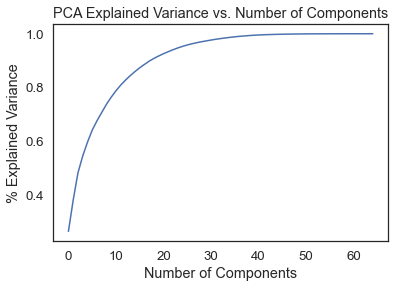

In [214]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca1 = PCA()
pca1.fit(x_train)
explained_variance_ratio = pca1.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [215]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca2 = PCA(n_components=component_95)
x_train = pca2.fit_transform(x_train)
x_test = pca2.transform(x_test)

24


# ¿Cuáles son las variables más importantes?

A continuación, exploro brevemente la importancia relativa de las características en el conjunto de datos utilizando los resultados de la pca realizados anteriormente. Esto se hace porque ayudará a responder a preguntas como: ¿qué factores influyen realmente en el tiempo que los pacientes permanecen en un hospital? Esta información podría resultar útil para los hospitales, ya que puede poner de relieve factores importantes a los que prestar atención

Calculo las características de mayor importancia basándome en su máxima contribución a lo largo de los dos componentes principales principales del conjunto de datos

In [216]:
pc_df = pd.DataFrame(pca2.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)

,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,age_range,Sexo,altura,peso
0,0.046706,0.058046,-0.208343,-0.209483,-0.210017,0.000901,0.051168,-0.206207,-0.206633,-0.207377,0.06758,0.04551,-0.205082,-0.20582,-0.206315,0.107465,0.125947,0.070718,-0.068623,-0.208379,-0.209628,-0.210317,-0.033821,-0.064106,-0.047419,-0.102354,-0.06574,-0.035819,0.053338,0.000364,0.000024,-0.004943,-0.023484,0.041994,0.043011,-0.208483,-0.209765,-0.210413,0.113006,0.044678,0.075773,0.066176,-0.032618,-0.020916,0.082317,0.039222,0.079291,0.094141,0.103624,0.025864,0.048123,0.049697,0.007474,-0.015191,0.017467,-0.156875,-0.129362,-0.148885,-0.043698,0.026898,0.062281,-0.004455,-0.002819,-0.003613,0.014044,0.115264,0.057203,0.010053,0.097285,0.023368,0.071114,0.059875,-0.146908,-0.140908,-0.147558,0.070412,0.09339,0.087193,0.085308,-0.020734,0.038001,0.040659


In [217]:
new_top_pc = top_pc.abs()
features = []
for i in range(0,10):
    features.append(new_top_pc.idxmax(axis=1).tolist())
    new_top_pc = new_top_pc.drop(columns=features[i])
print(features)

[['HCO3_mean'], ['Exc. Bases_mean'], ['BEecf_mean'], ['HCO3_amin'], ['Exc. Bases_amin'], ['BEecf_amin'], ['HCO3_amax'], ['Exc. Bases_amax'], ['BEecf_amax'], ['Bicarbonato Real_mean']]


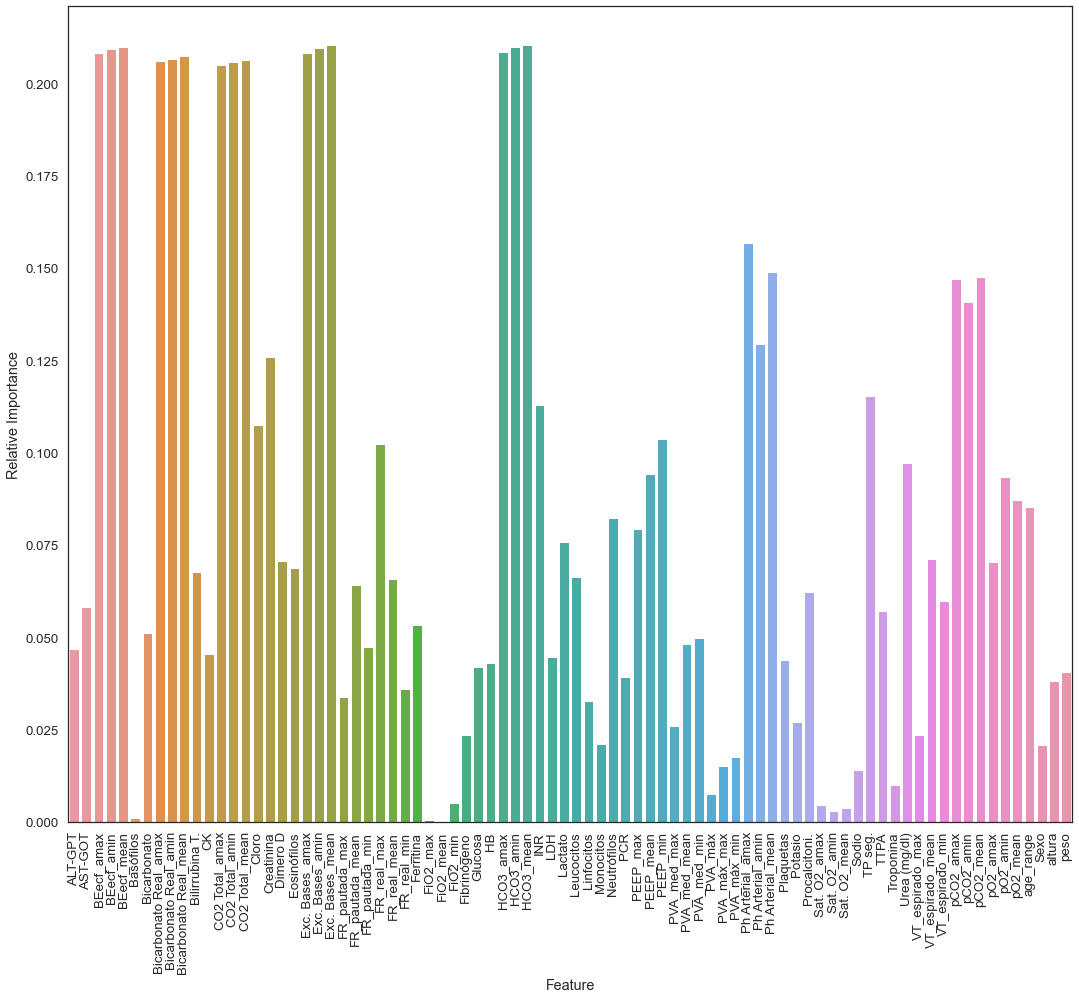

In [218]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(18,15))
sns.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

# Decision Tree

Para nuestro siguiente modelo, vamos a entrenar un clasificador de árbol de decisión. Los árboles de decisión son uno de los modelos más comunes para los problemas de clasificación, así que veamos cómo funciona uno en estos datos

In [219]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 1.0
Test Accuracy: 0.03571428571428571


Sin la optimización de los parámetros, podemos ver que hemos sobreajustado definitivamente. Esto es evidente en la altísima precisión de entrenamiento, pero con una precisión de prueba mucho menor. Sin embargo, nuestro rendimiento es mejor que el del modelo de regresión lineal. Veamos si podemos hacerlo mejor estableciendo algunos hiperparámetros del modelo

In [220]:
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=150)
dtree.fit(x_train,y_train)

train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.7384615384615385
Test Accuracy: 0.03571428571428571


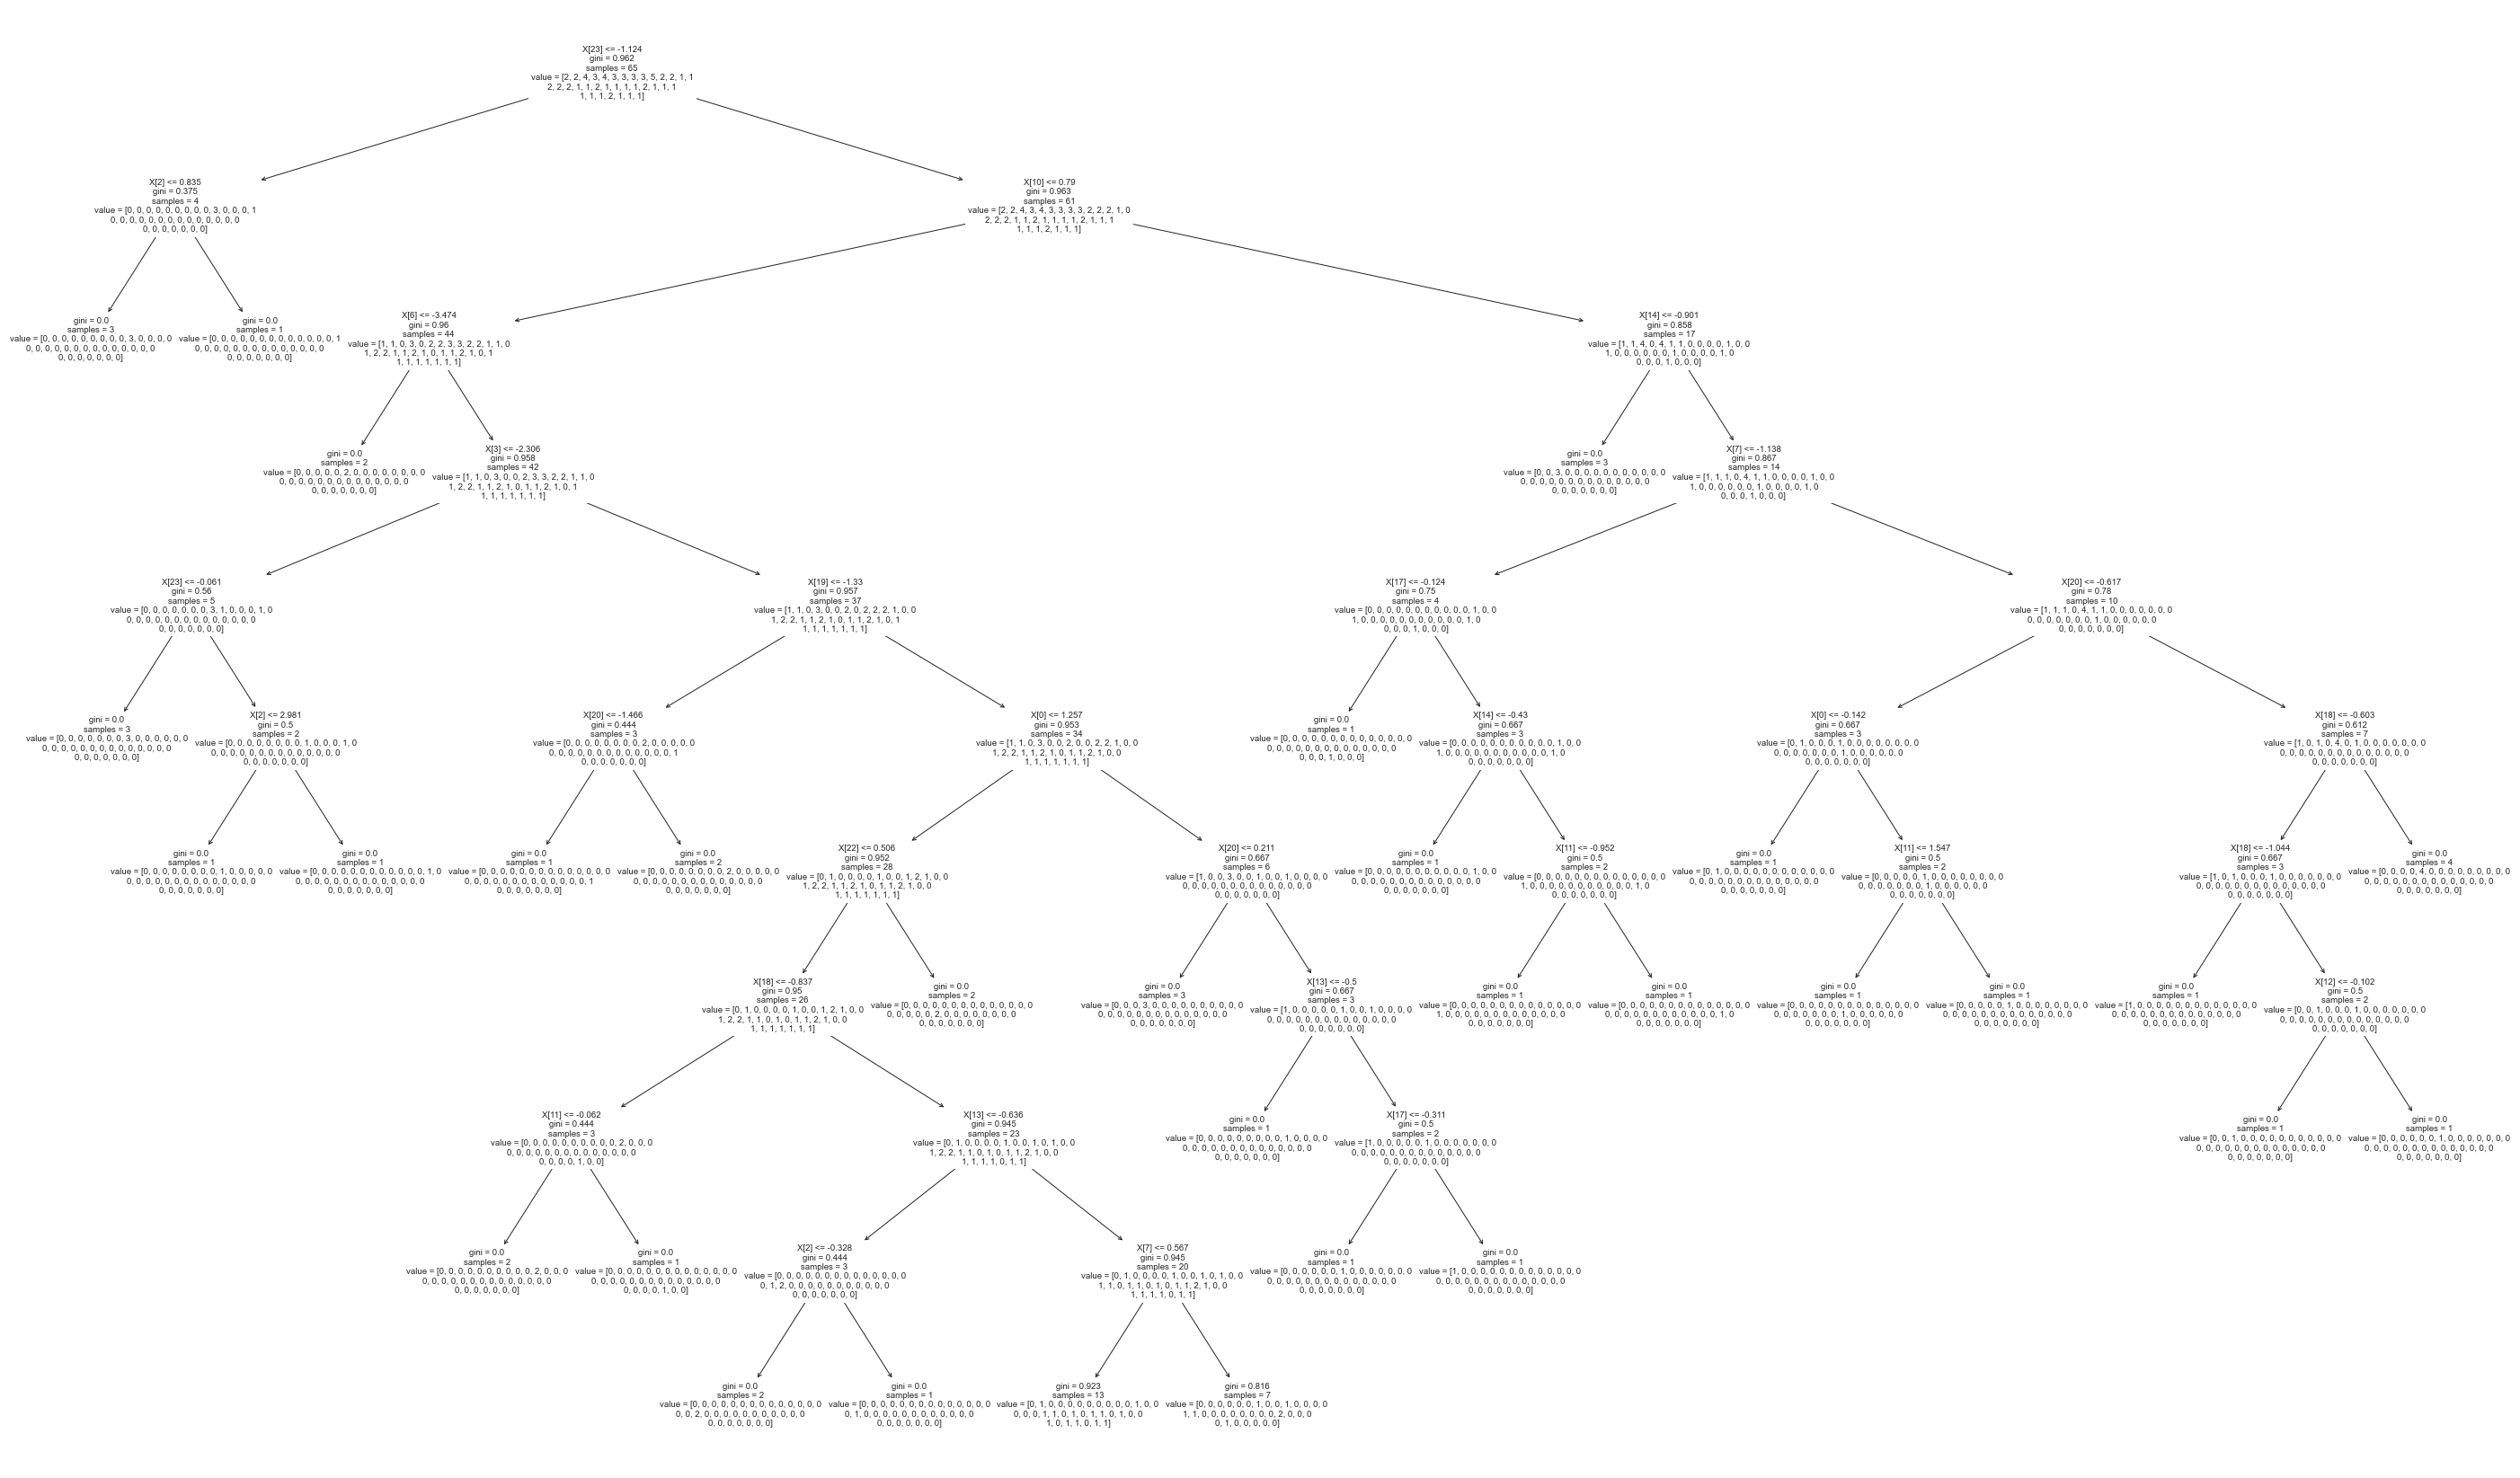

In [221]:
f, ax = plt.subplots(figsize=(50, 30))
plot_tree(dtree)
plt.show()

In [222]:
clf=DecisionTreeRegressor(max_depth=10, max_leaf_nodes=150)
clf.fit(x_train,y_train)
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

mse_test = mean_squared_error(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
y_round_pred = np.ndarray.round(test_pred)
y_round_train_pred = np.ndarray.round(train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

292.42857142857144
0.0
Test accuracy: 0.0
Train accuracy: 1.0


Podríamos seguir afinando los parámetros con el clasificador de árboles de decisión para obtener mejores resultados, pero obtendremos un mejor rendimiento utilizando un bosque aleatorio, un conjunto de árboles de decisión. Sin embargo, antes de intentar implementar otro modelo, decido buscar otra forma de aumentar el rendimiento del modelo.

Después de observar que la clasificación de los árboles de decisión parece funcionar mejor que la regresión, me inclino por seguir con la clasificación. En este sentido, crearé intervalos de duración de la estancia para construir una nueva columna de predicción categórica. Estas franjas no sólo tienen sentido, dado que no hay una gran diferencia entre permanecer en un hospital durante 57 días y 58 días, por ejemplo, sino que también aumentará la precisión de la predicción del modelo que construyo. Esto es evidente en el sentido de que el modelo puede ahora predecir que un determinado paciente permanecerá entre un rango determinado de días, en lugar de tener que predecir un número exacto de días. A continuación, realizaré esta construcción de nuevas categorías

# Label / Predictor Construction

Resumen de las conclusiones de esta sección:
* A partir de la sección de análisis exploratorio de datos de este proyecto, descubrí el enorme desequilibrio de clases presente en el conjunto de datos, dado que la mayoría de las estancias se agrupan en el rango de 1 a 5 días
* El desequilibrio de clases puede tener efectos negativos significativos en el rendimiento del modelo. Por ejemplo, la precisión del modelo puede ser engañosa si el modelo simplemente predice las clases que aparecen a menudo, ignorando en el proceso las características que pueden apuntar a que esa fila de datos pertenece a otra clase menos común. Me parece que éste es el caso de mis modelos.
* En esta sección, intento tratar este desequilibrio de clases de diferentes maneras, después de observar los efectos de este desequilibrio de clases en el rendimiento del modelo. Estos efectos se analizan en esta sección.
* Después de probar numerosos esquemas de etiquetado diferentes que implican intervalos de duración de la estancia de diferentes tamaños, y diferentes números de intervalos de duración de la estancia que permitieron más/menos especificidad en las predicciones, llegué a un formato de intervalo óptimo que tenía una alta puntuación de precisión para la mayoría de los modelos entrenados en él, sin perder grandes cantidades de especificidad en las predicciones
* Los intervalos que decidí utilizar para mis modelos finales son los siguientes 0-3, 3-6, 6-9, 9-13, 13-20, 20-50, 50-120+] donde todas las unidades están en días
* Este formato de bandeja da como resultado una precisión de referencia de 1/7, o una precisión de ~14,3% si el modelo adivinara al azar
A continuación se muestran algunos fragmentos del proceso iterativo por el que pasé para determinar este formato de bandeja óptimo

Al crear estas categorías, tendré en cuenta que quiero crear una distribución algo uniforme del número de filas de datos dentro de cada recipiente. La construcción de la etiqueta de abajo se hizo con el hecho de que las pequeñas diferencias en la duración de la estancia importan menos para los pacientes que tienen largas duraciones de estancia que para los pacientes que sólo se quedan 1 o 2 días. En otras palabras, la diferencia entre permanecer en un hospital 1 día frente a 2 días es más significativa que permanecer 119 días frente a 120 días

In [223]:
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,120]
survived_patients_vitals_length_of_stay_df['stay_bin']=pd.cut(x = survived_patients_vitals_length_of_stay_df["days_of_stay"],
                                                              bins = bins)
survived_patients_vitals_length_of_stay_df['stay_label']=pd.cut(x = survived_patients_vitals_length_of_stay_df["days_of_stay"],
                                                                bins = bins,
                                                                labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
survived_patients_vitals_length_of_stay_df['stay_bin'] = survived_patients_vitals_length_of_stay_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
survived_patients_vitals_length_of_stay_df['stay_bin'] = survived_patients_vitals_length_of_stay_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(survived_patients_vitals_length_of_stay_df)

,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,age_range,Sexo,altura,peso,days_of_stay,stay_bin,stay_label
0,-0.342479,-0.615439,-0.406824,-0.264413,-0.338256,-0.890395,0.703942,-0.722657,-0.483782,-0.606865,-0.175660,-0.044442,-0.688557,-0.568447,-0.630488,1.012796,-0.580336,0.197872,-0.804867,-0.236852,-0.156440,-0.169064,-0.971082,-0.997323,-1.663891,-0.186357,-0.641015,-0.309880,-0.185072,-0.092139,-0.011020,-0.589684,-0.988301,-0.476180,0.683343,-0.237664,-0.149716,-0.170306,-0.592830,0.415751,1.153441,0.074874,-0.294122,-0.539621,0.239339,-1.037800,-0.537679,-0.595318,-1.333665,-1.762127,-1.722938,-3.559406,-1.888163,-1.317640,-3.554121,1.170191,1.376870,1.377737,0.337023,0.331625,-0.359559,0.326776,0.674663,0.515756,0.852667,-0.601435,-0.035202,0.220047,0.075468,-1.375024,-2.155752,-2.351940,-1.426487,-1.285608,-1.390055,-0.262386,-0.283098,-0.282180,5,0.0,156.8,73.0,5,(4 - 5],4
1,-0.277667,-0.686120,0.834152,0.557329,0.703823,-0.610896,-1.181952,0.751195,0.412585,0.593852,0.209675,-0.657870,0.721954,0.386625,0.558118,-0.562227,-0.816621,-0.366628,-0.365061,0.872108,0.611748,0.761738,-1.150314,-1.218878,-0.971119,1.463270,0.897913,0.786024,-0.209301,0.867969,0.722467,0.694199,0.433972,-1.067847,-1.227472,0.880725,0.620913,0.778443,-0.246681,-0.188274,-0.973945,-0.378650,-0.262806,-0.382036,-0.269943,0.122788,0.466915,-0.324951,-1.219006,1.487381,1.395621,0.717506,-1.252714,-1.704958,-0.485074,1.332168,0.655931,1.057060,-1.149216,-0.173834,-0.312679,0.865853,0.589250,0.755781,-0.193295,-0.279854,-1.050189,-0.468926,-0.948314,-0.385610,-0.223720,0.696032,0.313149,-0.349416,-0.030313,0.989266,0.094131,0.627088,5,0.0,156.8,41.0,44,(40 - 45],16
2,-0.562336,-0.641168,0.459225,0.699799,0.582613,0.346070,-0.720523,0.427014,0.642627,0.540336,-0.675787,0.303340,0.395854,0.632374,0.519898,-0.549019,-0.586487,-0.600034,-0.184179,0.521757,0.659645,0.600205,0.561297,0.449184,0.178419,1.562323,1.073625,0.851556,-0.392908,0.764302,-0.346230,-0.265145,0.249496,-0.876651,-0.854418,0.537472,0.627486,0.579456,-0.181581,-0.904507,-0.789711,-0.690720,0.823280,0.601142,-0.970896,-0.018866,0.212663,0.207728,0.118049,0.404701,0.141070,-0.346368,0.570985,1.116504,0.080148,0.640045,-2.270939,-0.062741,0.497926,-0.776614,-0.317679,-1.611293,-1.186596,-1.386775,0.089288,-0.171231,0.952182,0.134310,-0.894105,-1.580303,-2.369170,-1.363155,-0.129571,-0.024902,-0.068923,0.420362,-1.297476,-0.293755,2,0.0,156.8,103.0,21,(20 - 25],12
3,-0.245076,-0.466531,2.753385,2.740732,2.750928,1.453941,-0.427502,3.042073,2.927007,2.985524,-0.465299,-0.783048,3.030383,3.016591,3.016768,-2.051606,-0.962537,-0.623150,0.784423,2.617303,2.574772,2.601566,1.787200,2.450870,2.158122,-0.051459,0.684008,0.227046,-0.137914,1.900653,2.351398,2.446844,-1.165457,-1.033070,0.603534,2.500149,2.441897,2.483722,-1.233954,0.613345,0.497628,1.719977,-0.299235,0.543533,1.758749,-0.964548,-1.268339,-1.381770,-1.382969,-0.626120,-0.258922,0.284484,1.078094,1.090882,1.127779,0.106243,-0.732879,-0.418172,-1.588010,0.152983,-0.296459,-2.206994,-2.009132,-2.195322,-0.334426,-1.220928,0.066183,0.220047,-0.811314,-1.079162,-2.001376,-0.730673,3.404440,3.548251,3.65

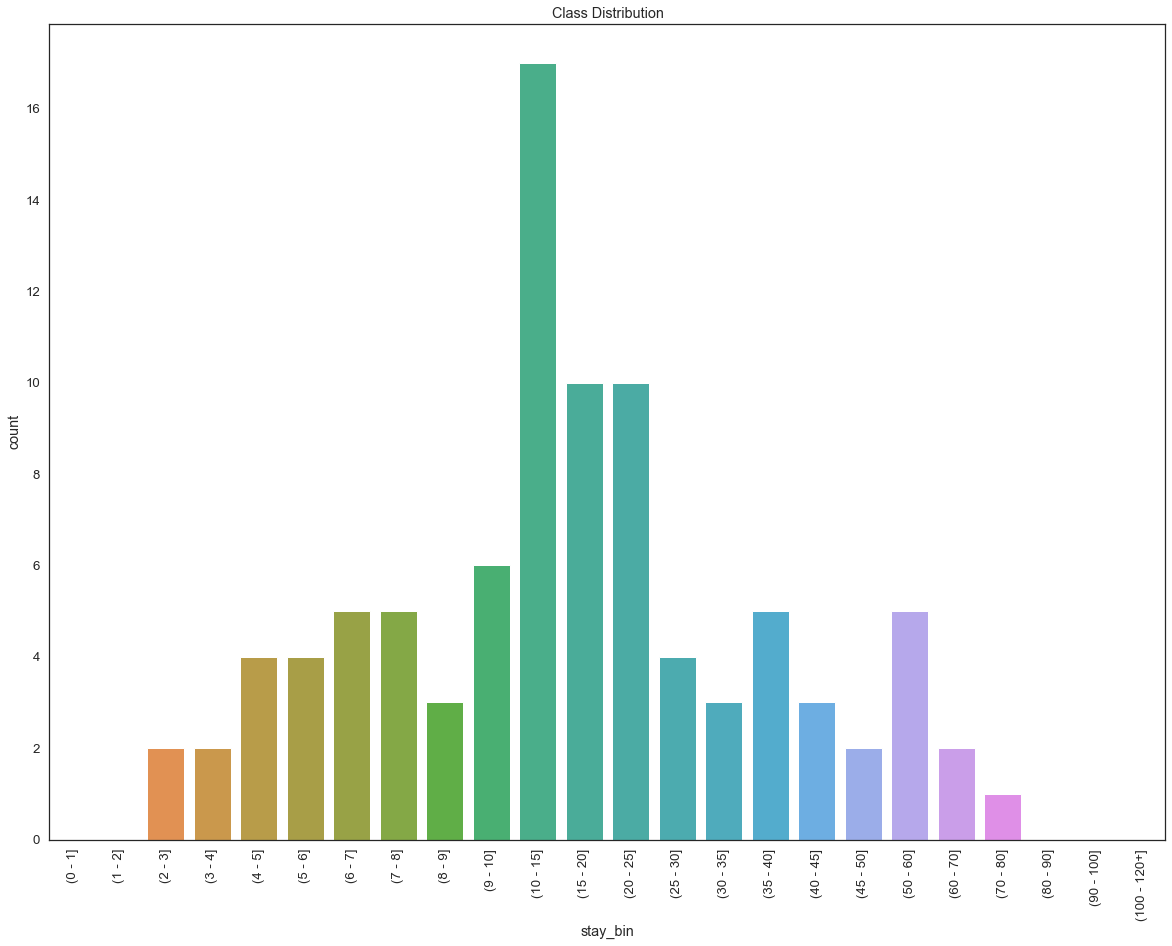

In [224]:
f, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x='stay_bin', data = survived_patients_vitals_length_of_stay_df)
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.show()

Vamos a ejecutar otro clasificador de árbol de decisión y ver cuánto mejora nuestra clasificación ahora con estos contenedores

In [225]:
#create train and test sets
new_X = survived_patients_vitals_length_of_stay_df.drop(["days_of_stay", "stay_bin","stay_label"], 1)
new_y = survived_patients_vitals_length_of_stay_df[["stay_label"]]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=50) #50 components, as found above
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [226]:
#perform decision tree classification
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=300)
dtree.fit(x_train,y_train)

train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 1.0
Test Accuracy: 0.0


Estamos obteniendo una precisión similar a la de nuestro árbol de decisión anterior. Esto me hizo levantar una ceja y plantear la hipótesis de que hay un problema de desequilibrio de clases, ya que el modelo puede estar prediciendo duraciones de estancia más cortas en ambos modelos ya que hay más instancias de estas clases. Vamos a trazar una matriz de confusión para ver si podemos confirmar esto

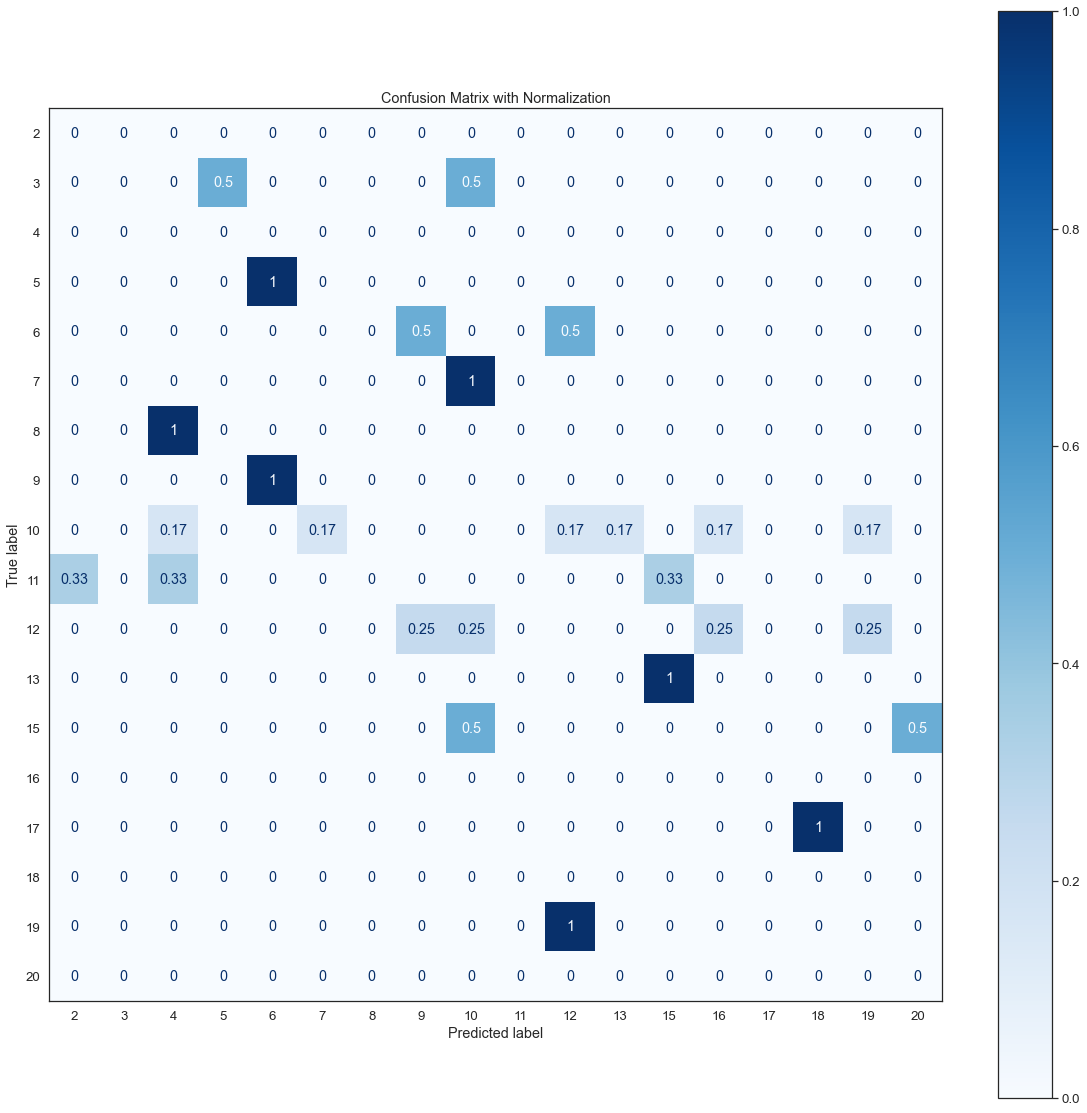

In [227]:
f, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

# Técnicas de submuestreo tras la construcción de etiquetas

In [65]:
%%capture
!pip3 install imblearn

In [66]:
#We can see that we have major class imbalance issues. I deal with that here
from collections import Counter 
counts = y_train["stay_label"].value_counts().tolist()
print(counts)
#df_class_0_under = df_class_0.sample(count_class_1)
#df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
resample_dict = {0:112307, 1:112307, 2:112307, 3:112307} #resample the first four classes to have the same number of instances as the (10-15] bucket
rus = RandomUnderSampler(random_state=0, sampling_strategy=resample_dict)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[11, 10, 6, 5, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0]


ValueError: The {0, 1} target class is/are not present in the data.

In [228]:
#perform decision tree classification with balanced class weight parameter
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 15, max_leaf_nodes=300, class_weight='balanced')
dtree.fit(x_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 1.0
Test Accuracy: 0.07142857142857142


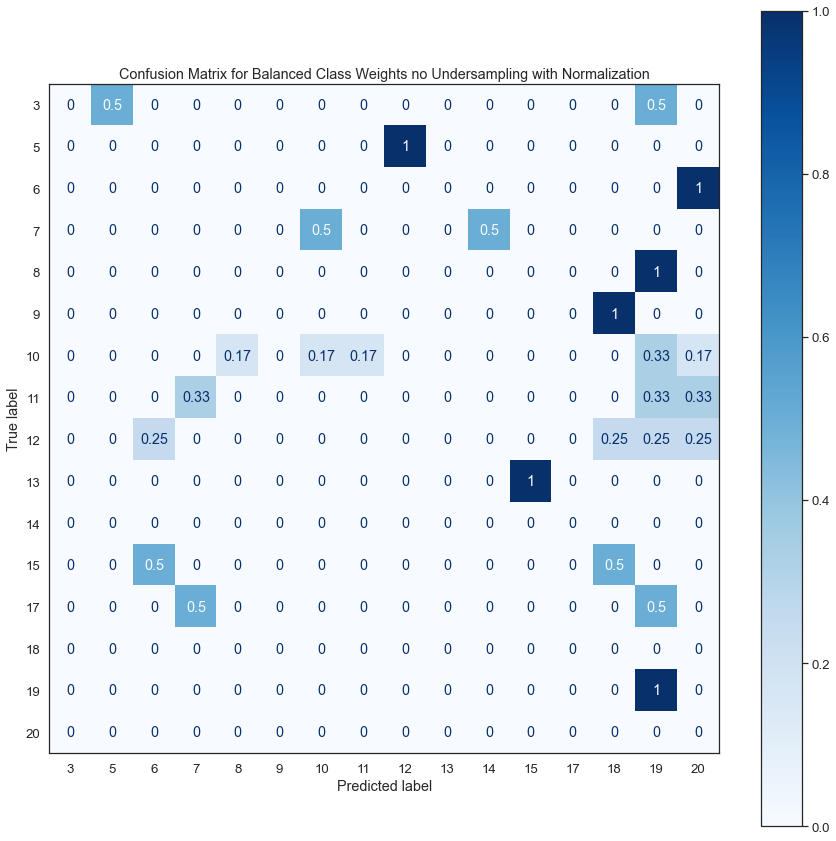

In [229]:
#confusion matrix for unbalanced classes with class_weights balanced
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix for Balanced Class Weights no Undersampling with Normalization')
plt.show()

# Balanceo de clase parte 2

In [230]:
#bins = [0,3,6,9,13,20,50,120]
#labels = [3,6,9,13,20,50,120]

bins = [0,5,10,20,30,50,120]
labels = [5,10,20,30,50,120]
survived_patients_vitals_length_of_stay_df['stay_bin']=pd.cut(x = survived_patients_vitals_length_of_stay_df['days_of_stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
survived_patients_vitals_length_of_stay_df['stay_label']=pd.cut(x = survived_patients_vitals_length_of_stay_df['days_of_stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
survived_patients_vitals_length_of_stay_df['stay_bin'] = survived_patients_vitals_length_of_stay_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
survived_patients_vitals_length_of_stay_df['stay_bin'] = survived_patients_vitals_length_of_stay_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(survived_patients_vitals_length_of_stay_df)

,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,age_range,Sexo,altura,peso,days_of_stay,stay_bin,stay_label
0,-0.342479,-0.615439,-0.406824,-0.264413,-0.338256,-0.890395,0.703942,-0.722657,-0.483782,-0.606865,-0.175660,-0.044442,-0.688557,-0.568447,-0.630488,1.012796,-0.580336,0.197872,-0.804867,-0.236852,-0.156440,-0.169064,-0.971082,-0.997323,-1.663891,-0.186357,-0.641015,-0.309880,-0.185072,-0.092139,-0.011020,-0.589684,-0.988301,-0.476180,0.683343,-0.237664,-0.149716,-0.170306,-0.592830,0.415751,1.153441,0.074874,-0.294122,-0.539621,0.239339,-1.037800,-0.537679,-0.595318,-1.333665,-1.762127,-1.722938,-3.559406,-1.888163,-1.317640,-3.554121,1.170191,1.376870,1.377737,0.337023,0.331625,-0.359559,0.326776,0.674663,0.515756,0.852667,-0.601435,-0.035202,0.220047,0.075468,-1.375024,-2.155752,-2.351940,-1.426487,-1.285608,-1.390055,-0.262386,-0.283098,-0.282180,5,0.0,156.8,73.0,5,(0 - 5],5
1,-0.277667,-0.686120,0.834152,0.557329,0.703823,-0.610896,-1.181952,0.751195,0.412585,0.593852,0.209675,-0.657870,0.721954,0.386625,0.558118,-0.562227,-0.816621,-0.366628,-0.365061,0.872108,0.611748,0.761738,-1.150314,-1.218878,-0.971119,1.463270,0.897913,0.786024,-0.209301,0.867969,0.722467,0.694199,0.433972,-1.067847,-1.227472,0.880725,0.620913,0.778443,-0.246681,-0.188274,-0.973945,-0.378650,-0.262806,-0.382036,-0.269943,0.122788,0.466915,-0.324951,-1.219006,1.487381,1.395621,0.717506,-1.252714,-1.704958,-0.485074,1.332168,0.655931,1.057060,-1.149216,-0.173834,-0.312679,0.865853,0.589250,0.755781,-0.193295,-0.279854,-1.050189,-0.468926,-0.948314,-0.385610,-0.223720,0.696032,0.313149,-0.349416,-0.030313,0.989266,0.094131,0.627088,5,0.0,156.8,41.0,44,(30 - 50],50
2,-0.562336,-0.641168,0.459225,0.699799,0.582613,0.346070,-0.720523,0.427014,0.642627,0.540336,-0.675787,0.303340,0.395854,0.632374,0.519898,-0.549019,-0.586487,-0.600034,-0.184179,0.521757,0.659645,0.600205,0.561297,0.449184,0.178419,1.562323,1.073625,0.851556,-0.392908,0.764302,-0.346230,-0.265145,0.249496,-0.876651,-0.854418,0.537472,0.627486,0.579456,-0.181581,-0.904507,-0.789711,-0.690720,0.823280,0.601142,-0.970896,-0.018866,0.212663,0.207728,0.118049,0.404701,0.141070,-0.346368,0.570985,1.116504,0.080148,0.640045,-2.270939,-0.062741,0.497926,-0.776614,-0.317679,-1.611293,-1.186596,-1.386775,0.089288,-0.171231,0.952182,0.134310,-0.894105,-1.580303,-2.369170,-1.363155,-0.129571,-0.024902,-0.068923,0.420362,-1.297476,-0.293755,2,0.0,156.8,103.0,21,(20 - 30],30
3,-0.245076,-0.466531,2.753385,2.740732,2.750928,1.453941,-0.427502,3.042073,2.927007,2.985524,-0.465299,-0.783048,3.030383,3.016591,3.016768,-2.051606,-0.962537,-0.623150,0.784423,2.617303,2.574772,2.601566,1.787200,2.450870,2.158122,-0.051459,0.684008,0.227046,-0.137914,1.900653,2.351398,2.446844,-1.165457,-1.033070,0.603534,2.500149,2.441897,2.483722,-1.233954,0.613345,0.497628,1.719977,-0.299235,0.543533,1.758749,-0.964548,-1.268339,-1.381770,-1.382969,-0.626120,-0.258922,0.284484,1.078094,1.090882,1.127779,0.106243,-0.732879,-0.418172,-1.588010,0.152983,-0.296459,-2.206994,-2.009132,-2.195322,-0.334426,-1.220928,0.066183,0.220047,-0.811314,-1.079162,-2.001376,-0.730673,3.404440,3.548251,3.65

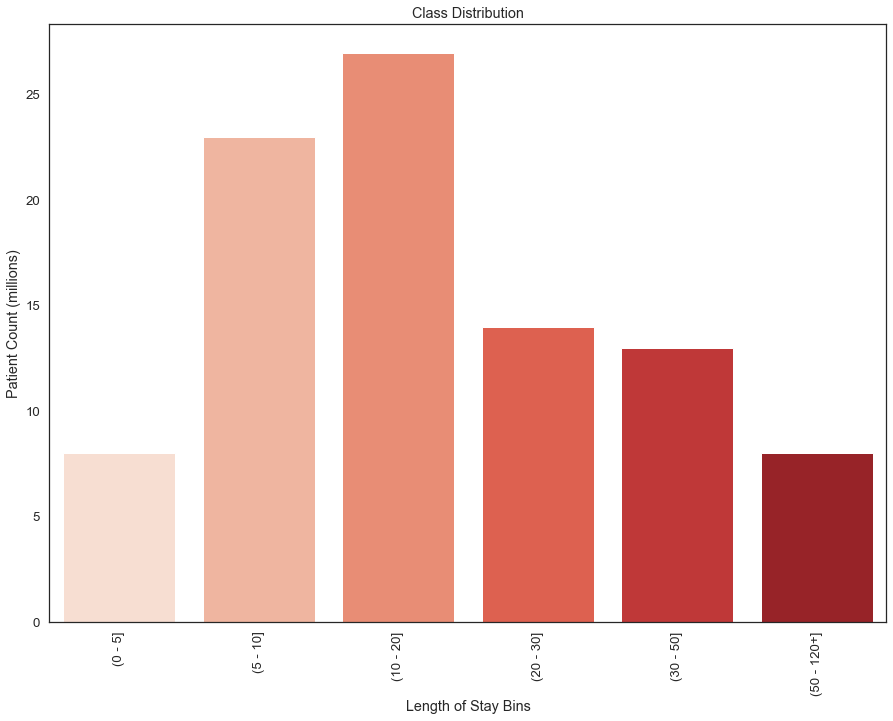

In [231]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = survived_patients_vitals_length_of_stay_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [263]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = survived_patients_vitals_length_of_stay_df.drop(['days_of_stay','stay_bin','stay_label'], axis=1)
new_y = survived_patients_vitals_length_of_stay_df[['stay_label']]

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=29) #29 components, as found above
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [272]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.values.ravel())
    return model.score(X_test, y_test.values.ravel())

In [279]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 1, class_weight = "balanced", max_depth = 15)

In [281]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

for train_index, test_index in kf.split(new_X):
    X_train, X_test, y_train, y_test = new_X.iloc[train_index], new_X.iloc[test_index], new_y.iloc[train_index], new_y.iloc[test_index]
    
    #print(get_score(LogisticRegression(multi_class='ovr'), X_train, X_test, y_train, y_test))
    #print(get_score(LogisticRegression(class_weight='balanced', multi_class='ovr'), X_train, X_test, y_train, y_test))
    print("RF")
    print(get_score(RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced'), X_train, X_test, y_train, y_test))
    print("AdaBoost")
    print(get_score(AdaBoostClassifier(dtree, n_estimators=75, random_state=0), X_train, X_test, y_train, y_test))

RF
0.2
AdaBoost
0.4
RF
0.4
AdaBoost
0.3
RF
0.4
AdaBoost
0.0
RF
0.3333333333333333
AdaBoost
0.1111111111111111
RF
0.1111111111111111
AdaBoost
0.5555555555555556
RF
0.2222222222222222
AdaBoost
0.5555555555555556
RF
0.2222222222222222
AdaBoost
0.2222222222222222
RF
0.3333333333333333
AdaBoost
0.4444444444444444
RF
0.4444444444444444
AdaBoost
0.5555555555555556
RF
0.5555555555555556
AdaBoost
0.2222222222222222


# Curva ROC

In [312]:
new_y.stay_label.values

[5, 50, 30, 20, 20, ..., 20, 10, 20, 10, 10]
Length: 93
Categories (6, int64): [5 < 10 < 20 < 30 < 50 < 120]

In [317]:
from sklearn.preprocessing import label_binarize

new_y_binarized = label_binarize(new_y, classes=[5, 10, 20, 30, 50, 120])

In [318]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y_binarized, test_size=0.33, random_state=0)

In [338]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced'))
rf.fit(X_train, y_train)

y_score = rf.predict_proba(X_test)

In [300]:
y_score

array([[0.0754717 , 0.05660377, 0.16981132, 0.06603774, 0.39622642,
        0.23584906],
       [0.        , 0.07207207, 0.2972973 , 0.36036036, 0.13513514,
        0.13513514],
       [0.13829787, 0.41489362, 0.11702128, 0.20212766, 0.10638298,
        0.0212766 ],
       [0.02970297, 0.59405941, 0.26732673, 0.05940594, 0.03960396,
        0.00990099],
       [0.00990099, 0.28712871, 0.16831683, 0.36633663, 0.07920792,
        0.08910891],
       [0.14851485, 0.32673267, 0.28712871, 0.0990099 , 0.06930693,
        0.06930693],
       [0.05825243, 0.36893204, 0.41747573, 0.15533981, 0.        ,
        0.        ],
       [0.04938272, 0.48148148, 0.19753086, 0.22222222, 0.02469136,
        0.02469136],
       [0.01098901, 0.34065934, 0.20879121, 0.41758242, 0.02197802,
        0.        ]])

In [339]:
n_classes = len(new_y.stay_label.unique())

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [345]:
def plot_roc_curve(fpr, tpr, roc_auc, n_classes):
    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr[5], tpr[5], label='ROC curve (area = %0.2f)' % roc_auc[5])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic class 6')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC curve
    plt.figure(figsize=(10, 8), dpi=80)
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)
    '''plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)'''
    
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

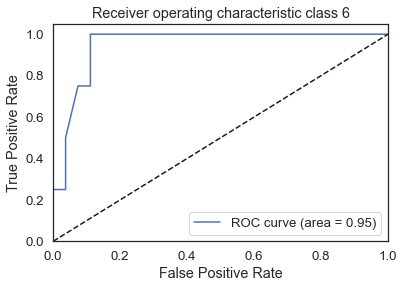

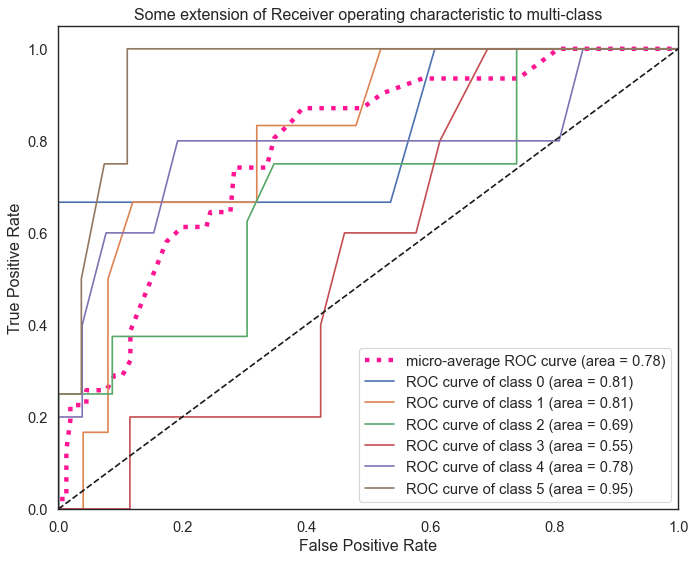

In [346]:
plot_roc_curve(fpr, tpr, roc_auc, n_classes)

In [332]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 1, class_weight = "balanced", max_depth = 15)

In [333]:
rf = OneVsRestClassifier(AdaBoostClassifier(dtree, n_estimators=75, random_state=0))
rf.fit(X_train, y_train)

y_score = rf.predict_proba(X_test)

In [334]:
n_classes = len(new_y.stay_label.unique())

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

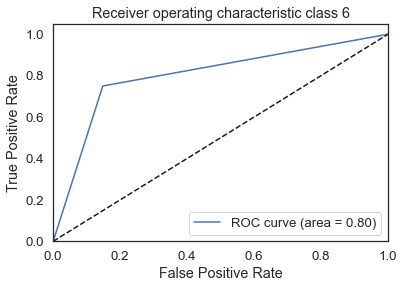

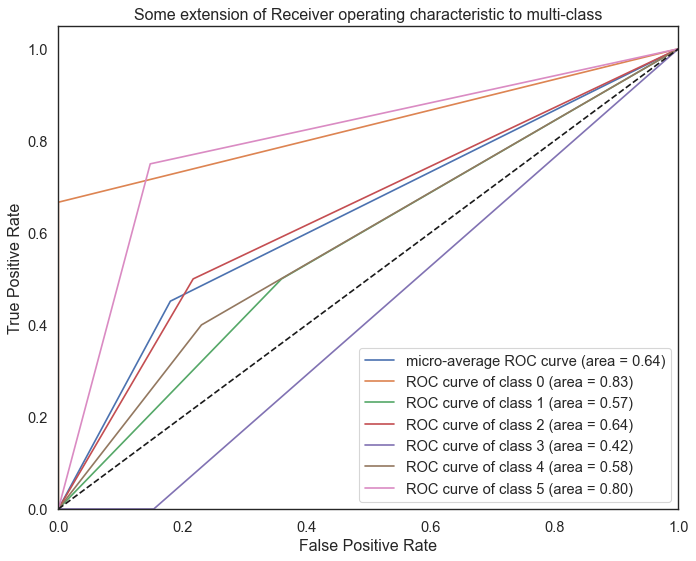

In [335]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[5], tpr[5], label='ROC curve (area = %0.2f)' % roc_auc[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic class 6')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [310]:
'''
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
'''

KeyError: 0

In [233]:
#logisitic regression without class balance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

Test accuracy: 0.42857142857142855
Train accuracy: 0.9384615384615385


/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


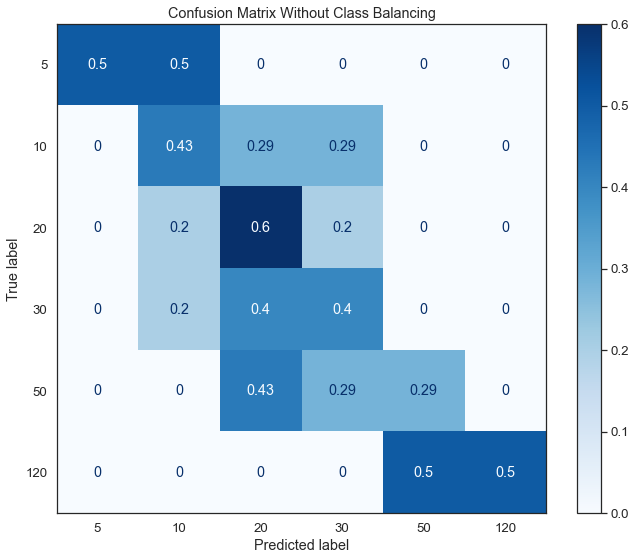

In [234]:
#Create confusion matrix for no class balancing
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix Without Class Balancing')
plt.show()

In [235]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       1.00      0.50      0.67         2
          10       0.50      0.43      0.46         7
          20       0.30      0.60      0.40         5
          30       0.29      0.40      0.33         5
          50       0.67      0.29      0.40         7
         120       1.00      0.50      0.67         2

    accuracy                           0.43        28
   macro avg       0.63      0.45      0.49        28
weighted avg       0.54      0.43      0.44        28



In [236]:
#logistic regression - works better with standardized but no PCA performed on data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(class_weight='balanced', multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

Test accuracy: 0.35714285714285715
Train accuracy: 0.9230769230769231


/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [237]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.50      0.50      0.50         2
          10       0.40      0.29      0.33         7
          20       0.30      0.60      0.40         5
          30       0.17      0.20      0.18         5
          50       0.50      0.29      0.36         7
         120       1.00      0.50      0.67         2

    accuracy                           0.36        28
   macro avg       0.48      0.40      0.41        28
weighted avg       0.42      0.36      0.36        28



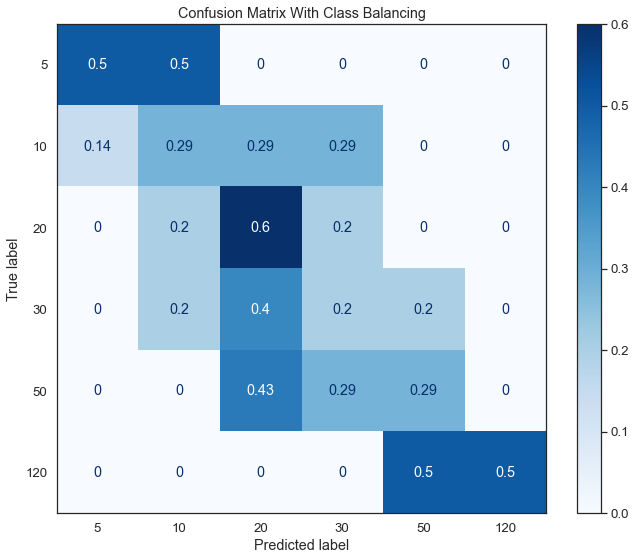

In [238]:
#Another example of importance of class balancing
#Create confusion matrix
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix With Class Balancing')
plt.show()

In [239]:
#overfit tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 1.0
Test Accuracy: 0.32142857142857145


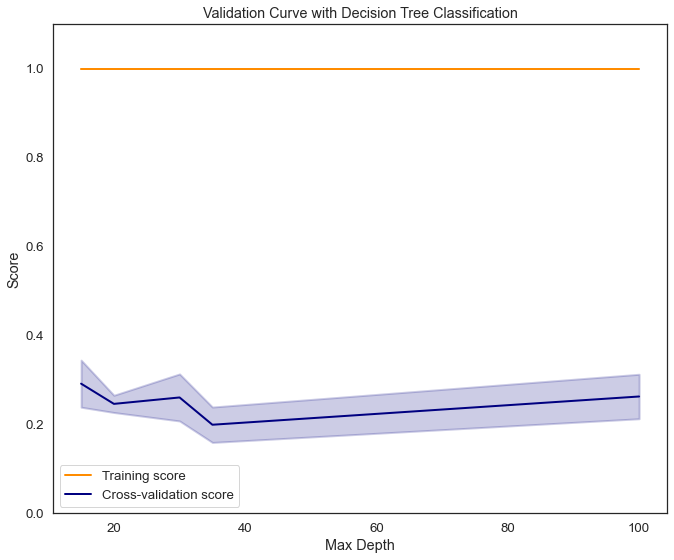

In [240]:
from sklearn.model_selection import validation_curve
param_range = [15,20,30,35,100]
train_scores, test_scores = validation_curve(dtree, x_train, y_train, param_name='max_depth', 
                                             param_range=param_range, cv=3, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(11,9))
plt.title("Validation Curve with Decision Tree Classification")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

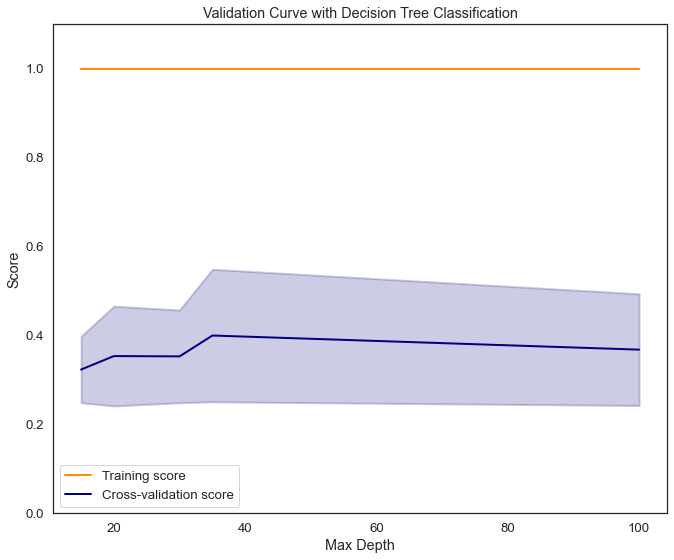

In [241]:
from sklearn.model_selection import validation_curve
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)
param_range = [15,20,30,35,100]
train_scores, test_scores = validation_curve(dtree, X_train, y_train, param_name='max_depth', 
                                             param_range=param_range, cv=3, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(11,9))
plt.title("Validation Curve with Decision Tree Classification")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [242]:
#try a randomized search on decision tree with 3-fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
search_vals = dict(max_depth=[35,50,75,100], max_leaf_nodes=[800,1000,1500,2000])
dtree_search = RandomizedSearchCV(dtree, search_vals, cv=3)
search = dtree_search.fit(X_train,y_train)
search.best_params_

{'max_leaf_nodes': 1500, 'max_depth': 75}

In [243]:
#decision tree optimal parameters
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 75, max_leaf_nodes=1500, class_weight='balanced')
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 1.0
Test Accuracy: 0.35714285714285715


In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         2
          10       0.45      0.71      0.56         7
          20       0.17      0.20      0.18         5
          30       0.33      0.20      0.25         5
          50       0.67      0.29      0.40         7
         120       0.33      0.50      0.40         2

    accuracy                           0.36        28
   macro avg       0.33      0.32      0.30        28
weighted avg       0.39      0.36      0.34        28



In [245]:
#randomized search on random forest with 3-fold CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight='balanced')
search_vals = dict(max_depth=[15,25,50], max_leaf_nodes=[600,800,1400], n_estimators=[100,300,500])
dtree_search = RandomizedSearchCV(rf, search_vals, cv=3)
search = dtree_search.fit(X_train,y_train)
search.best_params_

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn

{'n_estimators': 100, 'max_leaf_nodes': 1400, 'max_depth': 15}

In [246]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced')
rf.fit(X_train,y_train)

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

<ipython-input-246-cd364430505a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Train Accuracy: 1.0
Test Accuracy: 0.39285714285714285


In [247]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         2
          10       0.83      0.71      0.77         7
          20       0.24      0.80      0.36         5
          30       0.00      0.00      0.00         5
          50       0.00      0.00      0.00         7
         120       0.67      1.00      0.80         2

    accuracy                           0.39        28
   macro avg       0.29      0.42      0.32        28
weighted avg       0.30      0.39      0.31        28



/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

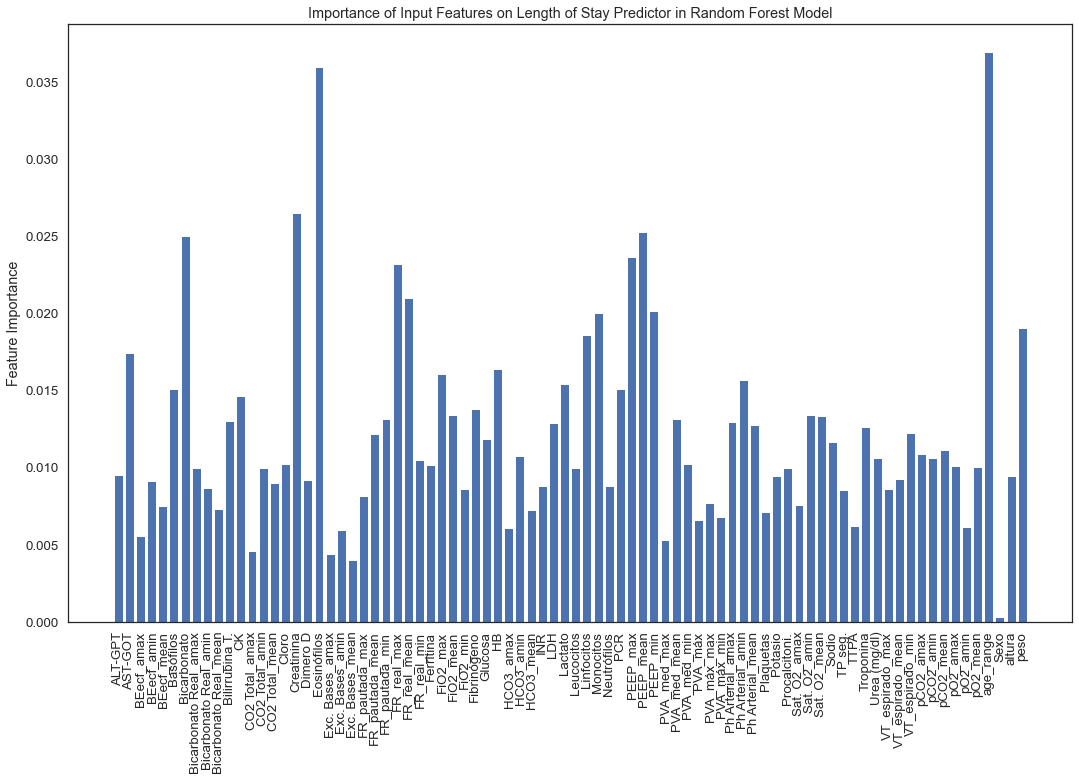

In [248]:
feat_importances = rf.feature_importances_
feat_names = X_train.columns.tolist()

plt.subplots(figsize=(18,11))
plt.xticks(rotation=90)
plt.bar(x=feat_names, height=feat_importances)
plt.title('Importance of Input Features on Length of Stay Predictor in Random Forest Model')
plt.ylabel('Feature Importance')
plt.show()

In [249]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state = 1, class_weight = "balanced", max_depth = 15)
boost = AdaBoostClassifier(dtree, n_estimators=75, random_state=0)
boost.fit(X_train, y_train)

train_predictions = boost.predict(X_train)
test_predictions = boost.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

Train Accuracy: 1.0
Test Accuracy: 0.39285714285714285


/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [250]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         2
          10       0.56      0.71      0.63         7
          20       0.25      0.40      0.31         5
          30       0.33      0.20      0.25         5
          50       0.67      0.29      0.40         7
         120       0.33      0.50      0.40         2

    accuracy                           0.39        28
   macro avg       0.36      0.35      0.33        28
weighted avg       0.43      0.39      0.38        28



# Creación de datos sintéticos

In [89]:
df_prueba = survived_patients_vitals_length_of_stay_df.drop(["stay_bin","stay_label"], axis=1)

In [90]:
df_prueba.head()

,age_range,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,days_of_stay
0,5,0.0,156.8,73.0,46.000000,28.000000,4.250000,3.250000,3.750000,0.025000,4.142500,27.500000,27.250000,27.375000,0.700000,230.250000,29.175000,28.250000,28.712500,107.750000,0.607500,12.675000,0.010000,4.325000,2.925000,3.760417,16.000000,15.800000,14.000000,23.500000,16.141173,12.250000,1508.750000,65.000000,54.435620,43.250000,273.000000,139.000000,12.400000,28.325000,27.250000,27.881250,1.042500,552.000000,2.700000,11.865000,0.800000,0.500000,10.575000,0.475000,9.750000,9.128125,7.000000,14.000000,11.634375,3.500000,17.860417,23.000000,5.250000,7.477500,7.440000,7.461250,270.250000,4.100000,0.000000,97.500000,96.750000,97.125000,144.250000,12.000000,35.300000,140.326000,67.500000,451.750000,343.779427,75.000000,40.250000,38.000000,39.062500,105.000000,82.750000,93.500000,5
1,5,0.0,156.8,41.0,55.302326,23.604651,10.976744,7.534884,9.261434,0.034419,3.103581,34.906977,31.604651,33.272093,0.995349,88.604651,36.534884,33.000000,34.740116,101.279070,0.447442,4.827907,0.128884,9.502326,6.400000,8.006279,15.558140,15.395349,15.232558,30.837209,21.673081,17.046512,1411.720930,77.767442,61.896761,54.348837,540.023256,118.069767,9.383256,32.465116,29.976744,31.289922,1.096977,443.418605,1.434884,9.570837,0.836744,0.561395,8.114419,8.793023,12.018605,9.684847,7.232558,22.581395,19.368609,15.627907,20.236047,21.488372,19.441860,7.484884,7.406512,7.447254,153.506977,3.930233,0.167907,98.674419,96.511628,97.707558,140.558140,12.581395,26.990698,19.857907,33.534884,565.953488,476.269601,434.116279,54.744186,44.023256,48.847287,130.767442,88.441860,108.410271,44
2,2,0.0,156.8,103.0,14.444444,26.400000,8.944444,8.277778,8.620370,0.066667,3.357778,33.277778,32.722222,33.009259,0.316667,310.555556,34.833333,34.222222,34.546296,101.333333,0.603333,1.583333,0.177778,7.866667,6.616667,7.269444,19.777778,18.441918,17.277778,31.277778,22.304703,17.333333,676.444444,76.388889,51.025814,46.055556,505.388889,124.833333,9.972222,31.194444,30.000000,30.575000,1.107222,314.666667,1.544444,7.992222,2.111111,0.944444,4.727778,7.777778,11.444444,10.781704,9.944444,19.722222,16.257240,12.611111,27.053955,32.500000,22.055556,7.453333,7.270556,7.398380,282.888889,3.727778,0.150000,93.277778,91.555556,92.507407,141.555556,12.777778,43.383333,125.334778,35.333333,428.055556,329.144170,191.500000,51.055556,46.111111,48.569444,119.055556,67.444444,93.310185,21
3,3,0.0,156.8,55.0,59.980000,37.260000,21.380000,18.920000,20.088333,0.104000,3.519200,46.420000,43.820000,45.018333,0.478000,59.700000,48.580000,46.080000,47.208333,95.160000,0.348600,1.262000,0.439600,17.650000,15.280000,16.398667,22.800000,22.097826,20.800000,24.100000,20.904167,14.600000,1697.600000,91.500000,78.466499,69.500000,239.740000,119.300000,12.274000,38.460000,36.420000,37.416667,0.941600,587.520000,2.310000,20.186800,0.794000,0.922000,17.916000,1.000000,8.100000,7.508712,6.900000,17.000000,15.265234,14.400000,28.949786,32.400000,26.900000,7.429000,7.342000,7.382867,119.040000,4.040000,0.226000,91.980000,89.260000,90.545000,140.060000,10.880000,36.130000,140.326000,38.080000,485

In [93]:
columns = df_prueba.columns.to_numpy()
iteration_count = 30
new_df = pd.DataFrame(columns=columns)

for i in range(iteration_count):
    for k in df_prueba.iterrows():
        data_obj = {}
        for j in range(columns.size):
            random_index = np.random.randint(0,13, dtype='int')
            data_obj[columns[j]] = df_prueba.loc[random_index][columns[j]]
        new_df = new_df.append(data_obj, ignore_index=True)

df_prueba = df_prueba.append(new_df, ignore_index=True)

In [94]:
df_prueba.shape

(89373, 83)

In [95]:
df_prueba.to_csv("augmented_data_survived_patients.csv")

In [218]:
df_before_normalize = pd.read_csv("augmented_data_survived_patients.csv")

In [219]:
df_before_normalize.drop("Unnamed: 0", axis=1, inplace=True)

In [221]:
df_aux.head()

,age_range,Sexo,altura,peso,days_of_stay
0,5,0.0,156.8,73.0,5
1,5,0.0,156.8,41.0,44
2,2,0.0,156.8,103.0,21
3,3,0.0,156.8,55.0,11
4,5,0.0,152.0,60.0,19


In [205]:
normalized_df.head()

,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean
0,-0.209525,-0.429516,-0.351608,-0.274616,-0.319873,-1.164007,0.788997,-0.565764,-0.409156,-0.502980,0.535034,-0.069564,-0.538865,-0.469945,-0.510932,1.067273,-0.494726,1.241539,-0.793071,-0.229881,-0.183554,-0.196183,-1.228873,-1.145196,-1.730104,-0.181911,-0.386240,-0.226983,-0.145011,0.104914,0.129163,-0.524904,-1.009608,-0.065813,0.913261,-0.223202,-0.177962,-0.187815,-0.400486,1.244844,1.489842,-0.007500,-0.664676,-0.705312,0.203767,-1.340957,-0.247933,-0.270966,-0.981722,-1.172784,-1.260852,-2.605887,-1.461197,-1.004129,-2.423760,0.839308,1.287677,1.171079,0.591789,0.626389,-0.484751,0.767680,0.958192,0.857603,0.796015,-0.390604,0.146674,0.505428,0.325003,-1.357697,-1.488141,-2.111738,-1.002957,-0.833653,-0.923585,0.011022,-0.081040,-0.037542
1,-0.108220,-0.508843,0.561154,0.325155,0.442333,-0.849318,-0.914188,0.501160,0.242885,0.370452,1.721697,-0.596264,0.480176,0.219367,0.353279,-0.621619,-0.827017,-0.180907,-0.482866,0.587179,0.392082,0.496742,-1.433070,-1.348484,-1.089539,1.022450,0.639341,0.686059,-0.214155,1.144191,0.944401,0.865911,1.338678,-0.648641,-1.068193,0.612130,0.408933,0.525107,-0.108385,-0.010848,-0.747942,-0.619097,-0.577325,-0.482524,-0.424679,0.599022,0.947135,0.032825,-0.861447,1.736278,1.637153,0.841500,-0.931656,-1.357858,-0.261350,0.977386,0.646198,0.875374,-0.923136,-0.276354,-0.391158,1.199532,0.878170,1.063112,-0.251710,-0.121087,-1.782946,-2.822898,-0.695184,-0.264854,0.117688,1.040156,0.314862,-0.184285,0.036145,1.101377,0.190908,0.669529
2,-0.553174,-0.458392,0.285388,0.429141,0.353677,0.228138,-0.497463,0.266485,0.410223,0.331524,-1.005136,0.229048,0.244581,0.396733,0.325490,-0.607457,-0.503376,-0.769053,-0.355286,0.329048,0.427973,0.376491,0.516952,0.182046,-0.026631,1.094767,0.756440,0.740657,-0.738118,1.031976,-0.243407,-0.173335,1.034093,-0.460301,-0.681348,0.355752,0.413939,0.375581,-0.053449,-1.499804,-0.554147,-1.039937,2.452195,0.907462,-1.289645,0.362240,0.644676,0.631357,0.541087,0.767029,0.471328,-0.016031,0.588096,1.218918,0.136898,0.387382,-1.958078,-0.157225,0.755799,-1.352912,-0.401139,-0.784896,-0.785600,-0.771346,0.031350,-0.030050,2.023818,0.091246,-0.641165,-1.584435,-1.665525,-1.089240,-0.020510,0.040807,0.008893,0.605786,-0.812313,-0.046543
3,-0.057279,-0.262393,1.972789,1.918772,1.939645,1.475500,-0.232830,2.159531,2.071941,2.110216,-0.356925,-0.703745,2.147927,2.117512,2.140914,-2.218676,-1.032220,-0.827301,0.327891,1.873004,1.863058,1.866380,1.913611,2.018694,1.803881,-0.083424,0.496789,0.220352,-0.010435,2.262028,2.754883,2.764530,-1.302106,-0.614384,0.830502,1.821690,1.795757,1.806513,-0.941505,1.655616,0.799996,2.210993,-0.678939,0.826017,2.078697,-1.218514,-1.117129,-1.154645,-1.033440,-0.155795,0.099625,0.492465,1.010687,1.195517,0.875045,-0.067662,-0.589540,-0.484978,-1.370399,0.307338,-0.358776,-1.262109,-1.556225,-1.463625,-0.393079,-0.909802,0.339420,0.505428,-0.558666,-1.030906,-1.359829,-0.435192,2.656593,2.519241,2.634653,-1.427696,-1.230108,-1.396333
4,0.088143,0.402692,-0.083995,-0.262952,-0.141882,-0.514340,-0.180516,-0.221661,-0.363404,-0.273269,-0.089962,-0.482828,-0.224640,

In [207]:
normalized_df.head()

,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,age_range,Sexo,altura,peso,days_of_stay
0,-0.209525,-0.429516,-0.351608,-0.274616,-0.319873,-1.164007,0.788997,-0.565764,-0.409156,-0.502980,0.535034,-0.069564,-0.538865,-0.469945,-0.510932,1.067273,-0.494726,1.241539,-0.793071,-0.229881,-0.183554,-0.196183,-1.228873,-1.145196,-1.730104,-0.181911,-0.386240,-0.226983,-0.145011,0.104914,0.129163,-0.524904,-1.009608,-0.065813,0.913261,-0.223202,-0.177962,-0.187815,-0.400486,1.244844,1.489842,-0.007500,-0.664676,-0.705312,0.203767,-1.340957,-0.247933,-0.270966,-0.981722,-1.172784,-1.260852,-2.605887,-1.461197,-1.004129,-2.423760,0.839308,1.287677,1.171079,0.591789,0.626389,-0.484751,0.767680,0.958192,0.857603,0.796015,-0.390604,0.146674,0.505428,0.325003,-1.357697,-1.488141,-2.111738,-1.002957,-0.833653,-0.923585,0.011022,-0.081040,-0.037542,5,0.0,156.8,73.0,5
1,-0.108220,-0.508843,0.561154,0.325155,0.442333,-0.849318,-0.914188,0.501160,0.242885,0.370452,1.721697,-0.596264,0.480176,0.219367,0.353279,-0.621619,-0.827017,-0.180907,-0.482866,0.587179,0.392082,0.496742,-1.433070,-1.348484,-1.089539,1.022450,0.639341,0.686059,-0.214155,1.144191,0.944401,0.865911,1.338678,-0.648641,-1.068193,0.612130,0.408933,0.525107,-0.108385,-0.010848,-0.747942,-0.619097,-0.577325,-0.482524,-0.424679,0.599022,0.947135,0.032825,-0.861447,1.736278,1.637153,0.841500,-0.931656,-1.357858,-0.261350,0.977386,0.646198,0.875374,-0.923136,-0.276354,-0.391158,1.199532,0.878170,1.063112,-0.251710,-0.121087,-1.782946,-2.822898,-0.695184,-0.264854,0.117688,1.040156,0.314862,-0.184285,0.036145,1.101377,0.190908,0.669529,5,0.0,156.8,41.0,44
2,-0.553174,-0.458392,0.285388,0.429141,0.353677,0.228138,-0.497463,0.266485,0.410223,0.331524,-1.005136,0.229048,0.244581,0.396733,0.325490,-0.607457,-0.503376,-0.769053,-0.355286,0.329048,0.427973,0.376491,0.516952,0.182046,-0.026631,1.094767,0.756440,0.740657,-0.738118,1.031976,-0.243407,-0.173335,1.034093,-0.460301,-0.681348,0.355752,0.413939,0.375581,-0.053449,-1.499804,-0.554147,-1.039937,2.452195,0.907462,-1.289645,0.362240,0.644676,0.631357,0.541087,0.767029,0.471328,-0.016031,0.588096,1.218918,0.136898,0.387382,-1.958078,-0.157225,0.755799,-1.352912,-0.401139,-0.784896,-0.785600,-0.771346,0.031350,-0.030050,2.023818,0.091246,-0.641165,-1.584435,-1.665525,-1.089240,-0.020510,0.040807,0.008893,0.605786,-0.812313,-0.046543,2,0.0,156.8,103.0,21
3,-0.057279,-0.262393,1.972789,1.918772,1.939645,1.475500,-0.232830,2.159531,2.071941,2.110216,-0.356925,-0.703745,2.147927,2.117512,2.140914,-2.218676,-1.032220,-0.827301,0.327891,1.873004,1.863058,1.866380,1.913611,2.018694,1.803881,-0.083424,0.496789,0.220352,-0.010435,2.262028,2.754883,2.764530,-1.302106,-0.614384,0.830502,1.821690,1.795757,1.806513,-0.941505,1.655616,0.799996,2.210993,-0.678939,0.826017,2.078697,-1.218514,-1.117129,-1.154645,-1.033440,-0.155795,0.099625,0.492465,1.010687,1.195517,0.875045,-0.067662,-0.589540,-0.484978,-1.370399,0.307338,-0.358776,-1.262109,-1.556225,-1.463625,-0.393079,-0.909802,0.339420,0.505428,-0.558666,-1.030906,-1.359829,-0.435192,2.656593,2.519241,2.634653,-1.427696,-1.230108,-1.396333,3,0.0,156.8,55.0,11
4,0.088143

In [208]:
df_prueba = normalized_df

In [209]:
bins = [0,5,10,20,30,50,120]
labels = [5,10,20,30,50,120]
df_prueba['stay_bin']=pd.cut(x = df_prueba['days_of_stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
df_prueba['stay_label']=pd.cut(x = df_prueba['days_of_stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
df_prueba['stay_bin'] = df_prueba['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
df_prueba['stay_bin'] = df_prueba['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(df_prueba)

,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,Basófilos,Bicarbonato,Bicarbonato Real_amax,Bicarbonato Real_amin,Bicarbonato Real_mean,Bilirrubina T.,CK,CO2 Total_amax,CO2 Total_amin,CO2 Total_mean,Cloro,Creatinina,Dimero D,Eosinófilos,Exc. Bases_amax,Exc. Bases_amin,Exc. Bases_mean,FR_pautada_max,FR_pautada_mean,FR_pautada_min,FR_real_max,FR_real_mean,FR_real_min,Ferritina,FiO2_max,FiO2_mean,FiO2_min,Fibrinógeno,Glucosa,HB,HCO3_amax,HCO3_amin,HCO3_mean,INR,LDH,Lactato,Leucocitos,Linfocitos,Monocitos,Neutrófilos,PCR,PEEP_max,PEEP_mean,PEEP_min,PVA_med_max,PVA_med_mean,PVA_med_min,PVA_máx,PVA_máx_max,PVA_máx_min,Ph Arterial_amax,Ph Arterial_amin,Ph Arterial_mean,Plaquetas,Potasio,Procalcitoni.,Sat. O2_amax,Sat. O2_amin,Sat. O2_mean,Sodio,TP seg.,TTPA,Troponina,Urea (mg/dl),VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,age_range,Sexo,altura,peso,days_of_stay,stay_bin,stay_label
0,-0.209525,-0.429516,-0.351608,-0.274616,-0.319873,-1.164007,0.788997,-0.565764,-0.409156,-0.502980,0.535034,-0.069564,-0.538865,-0.469945,-0.510932,1.067273,-0.494726,1.241539,-0.793071,-0.229881,-0.183554,-0.196183,-1.228873,-1.145196,-1.730104,-0.181911,-0.386240,-0.226983,-0.145011,0.104914,0.129163,-0.524904,-1.009608,-0.065813,0.913261,-0.223202,-0.177962,-0.187815,-0.400486,1.244844,1.489842,-0.007500,-0.664676,-0.705312,0.203767,-1.340957,-0.247933,-0.270966,-0.981722,-1.172784,-1.260852,-2.605887,-1.461197,-1.004129,-2.423760,0.839308,1.287677,1.171079,0.591789,0.626389,-0.484751,0.767680,0.958192,0.857603,0.796015,-0.390604,0.146674,0.505428,0.325003,-1.357697,-1.488141,-2.111738,-1.002957,-0.833653,-0.923585,0.011022,-0.081040,-0.037542,5,0.0,156.8,73.0,5,(0 - 5],5
1,-0.108220,-0.508843,0.561154,0.325155,0.442333,-0.849318,-0.914188,0.501160,0.242885,0.370452,1.721697,-0.596264,0.480176,0.219367,0.353279,-0.621619,-0.827017,-0.180907,-0.482866,0.587179,0.392082,0.496742,-1.433070,-1.348484,-1.089539,1.022450,0.639341,0.686059,-0.214155,1.144191,0.944401,0.865911,1.338678,-0.648641,-1.068193,0.612130,0.408933,0.525107,-0.108385,-0.010848,-0.747942,-0.619097,-0.577325,-0.482524,-0.424679,0.599022,0.947135,0.032825,-0.861447,1.736278,1.637153,0.841500,-0.931656,-1.357858,-0.261350,0.977386,0.646198,0.875374,-0.923136,-0.276354,-0.391158,1.199532,0.878170,1.063112,-0.251710,-0.121087,-1.782946,-2.822898,-0.695184,-0.264854,0.117688,1.040156,0.314862,-0.184285,0.036145,1.101377,0.190908,0.669529,5,0.0,156.8,41.0,44,(30 - 50],50
2,-0.553174,-0.458392,0.285388,0.429141,0.353677,0.228138,-0.497463,0.266485,0.410223,0.331524,-1.005136,0.229048,0.244581,0.396733,0.325490,-0.607457,-0.503376,-0.769053,-0.355286,0.329048,0.427973,0.376491,0.516952,0.182046,-0.026631,1.094767,0.756440,0.740657,-0.738118,1.031976,-0.243407,-0.173335,1.034093,-0.460301,-0.681348,0.355752,0.413939,0.375581,-0.053449,-1.499804,-0.554147,-1.039937,2.452195,0.907462,-1.289645,0.362240,0.644676,0.631357,0.541087,0.767029,0.471328,-0.016031,0.588096,1.218918,0.136898,0.387382,-1.958078,-0.157225,0.755799,-1.352912,-0.401139,-0.784896,-0.785600,-0.771346,0.031350,-0.030050,2.023818,0.091246,-0.641165,-1.584435,-1.665525,-1.089240,-0.020510,0.040807,0.008893,0.605786,-0.812313,-0.046543,2,0.0,156.8,103.0,21,(20 - 30],30
3,-0.057279,-0.262393,1.972789,1.918772,1.939645,1.475500,-0.232830,2.159531,2.071941,2.110216,-0.356925,-0.703745,2.147927,2.117512,2.140914,-2.218676,-1.032220,-0.827301,0.327891,1.873004,1.863058,1.866380,1.913611,2.018694,1.803881,-0.083424,0.496789,0.220352,-0.010435,2.262028,2.754883,2.764530,-1.302106,-0.614384,0.830502,1.821690,1.795757,1.806513,-0.941505,1.655616,0.799996,2.210993,-0.678939,0.826017,2.078697,-1.218514,-1.117129,-1.154645,-1.033440,-0.155795,0.099625,0.492465,1.010687,1.195517,0.875045,-0.067662,-0.589540,-0.484978,-1.370399,0.307338,-0.358776,-1.262109,-1.556225,-1.463625,-0.393079,-0.909802,0.339420,0.505428,-0.558666,-1.030906,-1.359829,-0.435192,2.656593,2.519241,2.634653,-1.4

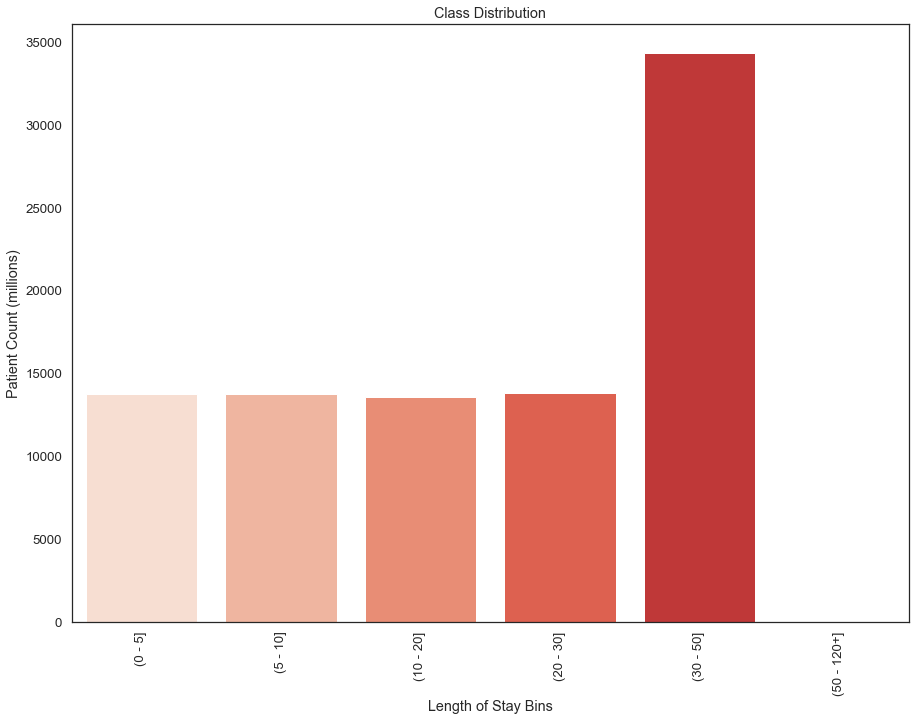

In [210]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = df_prueba, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [211]:
#create train and test sets
new_X = df_prueba.drop(['days_of_stay','stay_bin','stay_label'], axis=1)
new_y = df_prueba[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=29) #29 components, as found above
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [212]:
#logisitic regression without class balance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test accuracy: 0.38382067730866776
Train accuracy: 0.3851760681574783


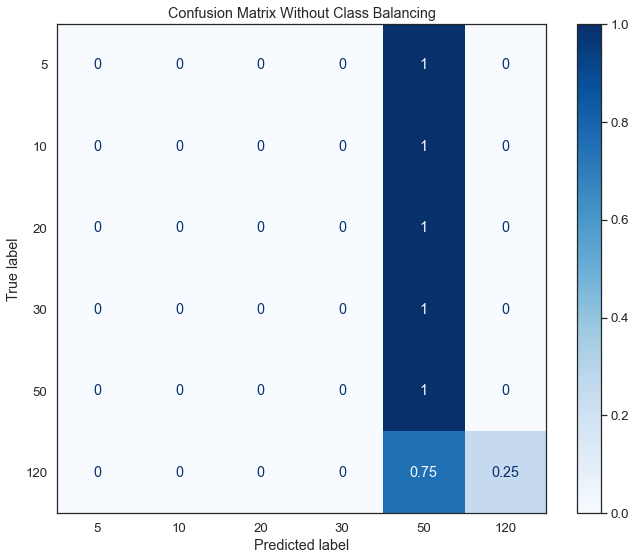

In [213]:
#Create confusion matrix for no class balancing
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix Without Class Balancing')
plt.show()

In [214]:
#logistic regression - works better with standardized but no PCA performed on data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(class_weight='balanced', multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test accuracy: 0.2036401611218857
Train accuracy: 0.21457457521459056


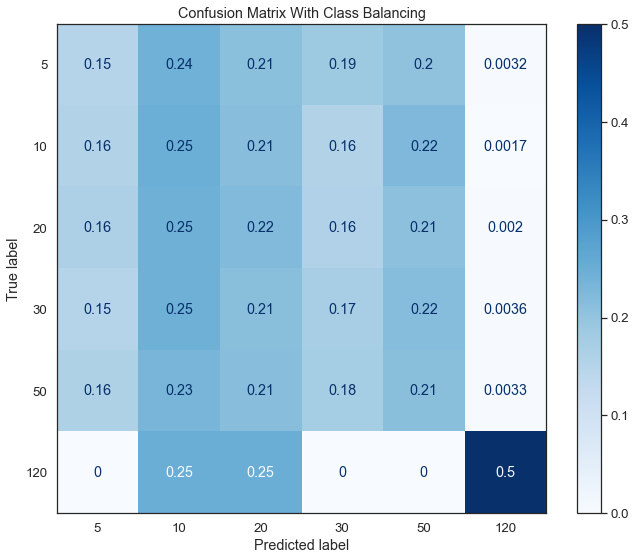

In [215]:
#Another example of importance of class balancing
#Create confusion matrix
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix With Class Balancing')
plt.show()

In [216]:
#overfit tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 1.0
Test Accuracy: 0.24351036849172011


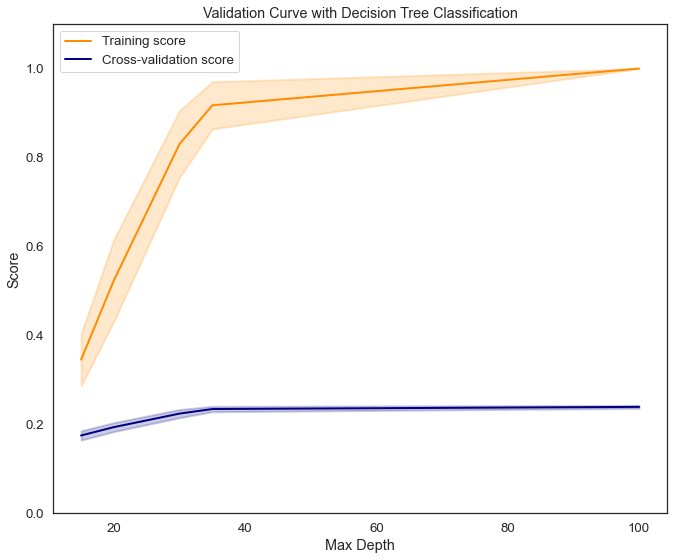

In [157]:
from sklearn.model_selection import validation_curve
param_range = [15,20,30,35,100]
train_scores, test_scores = validation_curve(dtree, x_train, y_train, param_name='max_depth', 
                                             param_range=param_range, cv=3, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(11,9))
plt.title("Validation Curve with Decision Tree Classification")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

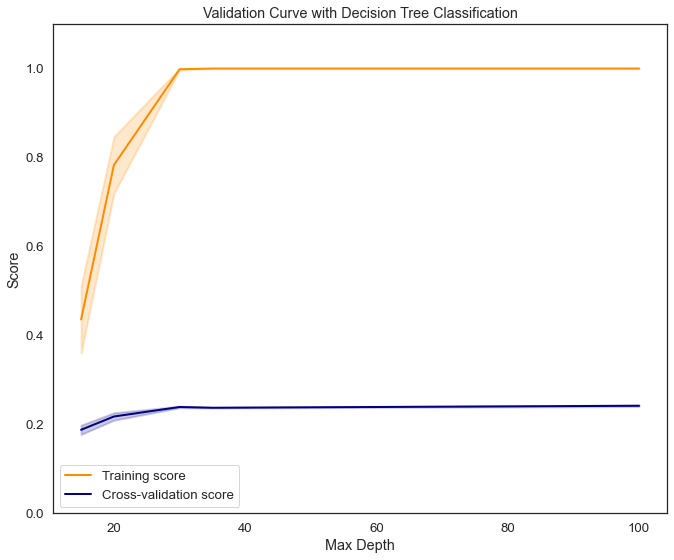

In [158]:
from sklearn.model_selection import validation_curve
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)
param_range = [15,20,30,35,100]
train_scores, test_scores = validation_curve(dtree, X_train, y_train, param_name='max_depth', 
                                             param_range=param_range, cv=3, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(11,9))
plt.title("Validation Curve with Decision Tree Classification")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [159]:
#try a randomized search on decision tree with 3-fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
search_vals = dict(max_depth=[35,50,75,100], max_leaf_nodes=[800,1000,1500,2000])
dtree_search = RandomizedSearchCV(dtree, search_vals, cv=3)
search = dtree_search.fit(X_train,y_train)
search.best_params_

{'max_leaf_nodes': 2000, 'max_depth': 35}

In [217]:
#decision tree optimal parameters
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 35, max_leaf_nodes=2000, class_weight='balanced')
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.3408353447035693
Test Accuracy: 0.17585409518126213


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.15      0.27      0.19      4055
          10       0.16      0.22      0.18      4150
          20       0.15      0.21      0.18      4128
          30       0.16      0.20      0.18      4262
          50       0.38      0.11      0.17     10213
         120       0.00      0.00      0.00         4

    accuracy                           0.18     26812
   macro avg       0.17      0.17      0.15     26812
weighted avg       0.24      0.18      0.18     26812



# Normality tests

In [53]:
patient_vitals_df.describe()

,NHC,Edad,Sexo,altura,peso,ALT-GPT,AST-GOT,BEecf_amax,BEecf_amin,BEecf_mean,...,VT_espirado_max,VT_espirado_mean,VT_espirado_min,pCO2_amax,pCO2_amin,pCO2_mean,pO2_amax,pO2_amin,pO2_mean,death_48_x
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,...,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,4882.588137,47.656319,0.804324,157.836253,67.374446,79.974058,51.364523,8.425277,6.538137,7.481152,...,629.403304,498.568491,340.568425,53.978936,47.471840,50.579112,107.366962,84.179213,95.120006,0.041020
std,2804.401391,14.397972,0.396830,9.059806,15.248138,150.917833,99.571831,7.596626,7.449706,7.381104,...,196.362336,106.633857,169.476613,15.193207,11.414633,12.377062,43.177285,23.349648,27.491287,0.198391
min,5.000000,21.000000,0.000000,137.000000,41.000000,5.000000,7.000000,-17.000000,-17.000000,-17.000000,...,0.000000,0.000000,0.000000,21.000000,5.000000,21.000000,25.000000,25.000000,25.000000,0.000000
25%,2454.000000,35.750000,1.000000,152.000000,55.500000,27.000000,23.400000,3.000000,2.000000,2.500000,...,516.850000,443.000469,251.310000,44.000000,41.000000,42.666667,84.000000,69.000000,78.500000,0.000000
50%,5148.000000,50.000000,1.000000,156.700000,65.000000,47.000000,35.300000,8.000000,6.000000,7.333333,...,590.400000,501.822770,384.260000,50.000000,46.000000,48.166667,100.000000,81.000000,91.000000,0.000000
75%,7197.000000,60.000000,1.000000,167.000000,77.000000,79.000000,53.000000,13.000000,11.000000,11.925000,...,709.250000,554.110714,463.000000,59.000000,52.000000,55.000000,123.000000,96.000000,108.000000,0.000000
max,9897.000000,76.000000,1.000000,176.000000,113.000000,2468.000000,2734.000000,46.000000,45.000000,45.000000,...,1883.800000,1012.000000,823.000000,150.000000,136.000000,136.000000,774.000000,220.000000,435.000000,1.000000


In [68]:
prop_death_class = pd.crosstab(index=patient_vitals_df["death_48_x"], columns="count")
prop_death_class["count"].apply(lambda x: x / prop_death_class["count"].sum())

death_48_x
0.0    0.95898
1.0    0.04102
Name: count, dtype: float64

Como se puede observar, los datos están muy desbalanceados

# Split data into train, test and validation

In [65]:
# split into input and output elements
X, y = patient_vitals_df[:, :-1], patient_vitals_df[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

TypeError: '(slice(None, None, None), slice(None, -1, None))' is an invalid key

# Outlier detection

# Feature scaling